In [8]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from Levenshtein import hamming
from Levenshtein import distance
import subprocess
%load_ext autoreload
%autoreload 2
import warnings
warnings.simplefilter('ignore')

In [2]:
sys.path.append('.../Metrics/')

In [8]:
# list HLA type I
hla = ['A*02:01', 'A*03:01', 'B*13:02', 'B*14:02', 'C*06:02', 'C*08:02']

In [13]:
# Timepoints
path_tcr_month1 = '/uftp/Blood/db_calc_pipeline/BG001082_december_sum/PBMC_BULK_April_TCR_qc_pass.txt'
path_bcr_month1 = '/uftp/Blood/db_calc_pipeline/BG001082_december_sum/PBMC_BULK_April_BCR_qc_pass.txt'

path_tcr_month2 = '/uftp/Blood/db_calc_pipeline/BG001082_december_sum/PBMC_BULK_August_TCR_qc_pass.txt'
path_bcr_month2 = '/uftp/Blood/db_calc_pipeline/BG001082_december_sum/PBMC_BULK_August_BCR_qc_pass.txt'

path_tcr_month3 = '/uftp/Blood/db_calc_pipeline/BG001082_december_sum/PBMC_BULK_December_TCR_qc_path.txt'
path_bcr_month3 = '/uftp/Blood/db_calc_pipeline/BG001082_december_sum/PBMC_BULK_BCR_qc_pass.txt'
# Last timepoint
path_tcr_time_point = '/uftp/Blood/db_calc_pipeline/BG001082/220405_NovaD_Sample_26/TCR_qc_pass.txt'
path_bcr_time_point = '/uftp/Blood/db_calc_pipeline/BG001082/220405_NovaD_Sample_26/BCR_qc_pass.txt'
# df for last timepoint
df_tcr = pd.read_csv(path_tcr_220405, sep='\t')
df_bcr = pd.read_csv(path_bcr_220405, sep='\t')
pathes_tcr = [path_tcr_month1, path_tcr_month2, path_tcr_month3, path_tcr_time_point]
pathes_bcr = [path_bcr_month1, path_bcr_month2, path_bcr_month3, path_bcr_time_point]
names = ['month1', 'month2', 'month3', 'time_point']

In [10]:
# reqired parameters
seq_type = 'BULK'
material_type = 'PBMC'
patient = 'patient name'
save_path = '/path'
age = 'xx'

# Top 10 clonotypes histogram

In [442]:
from Top_clones_histogram import *

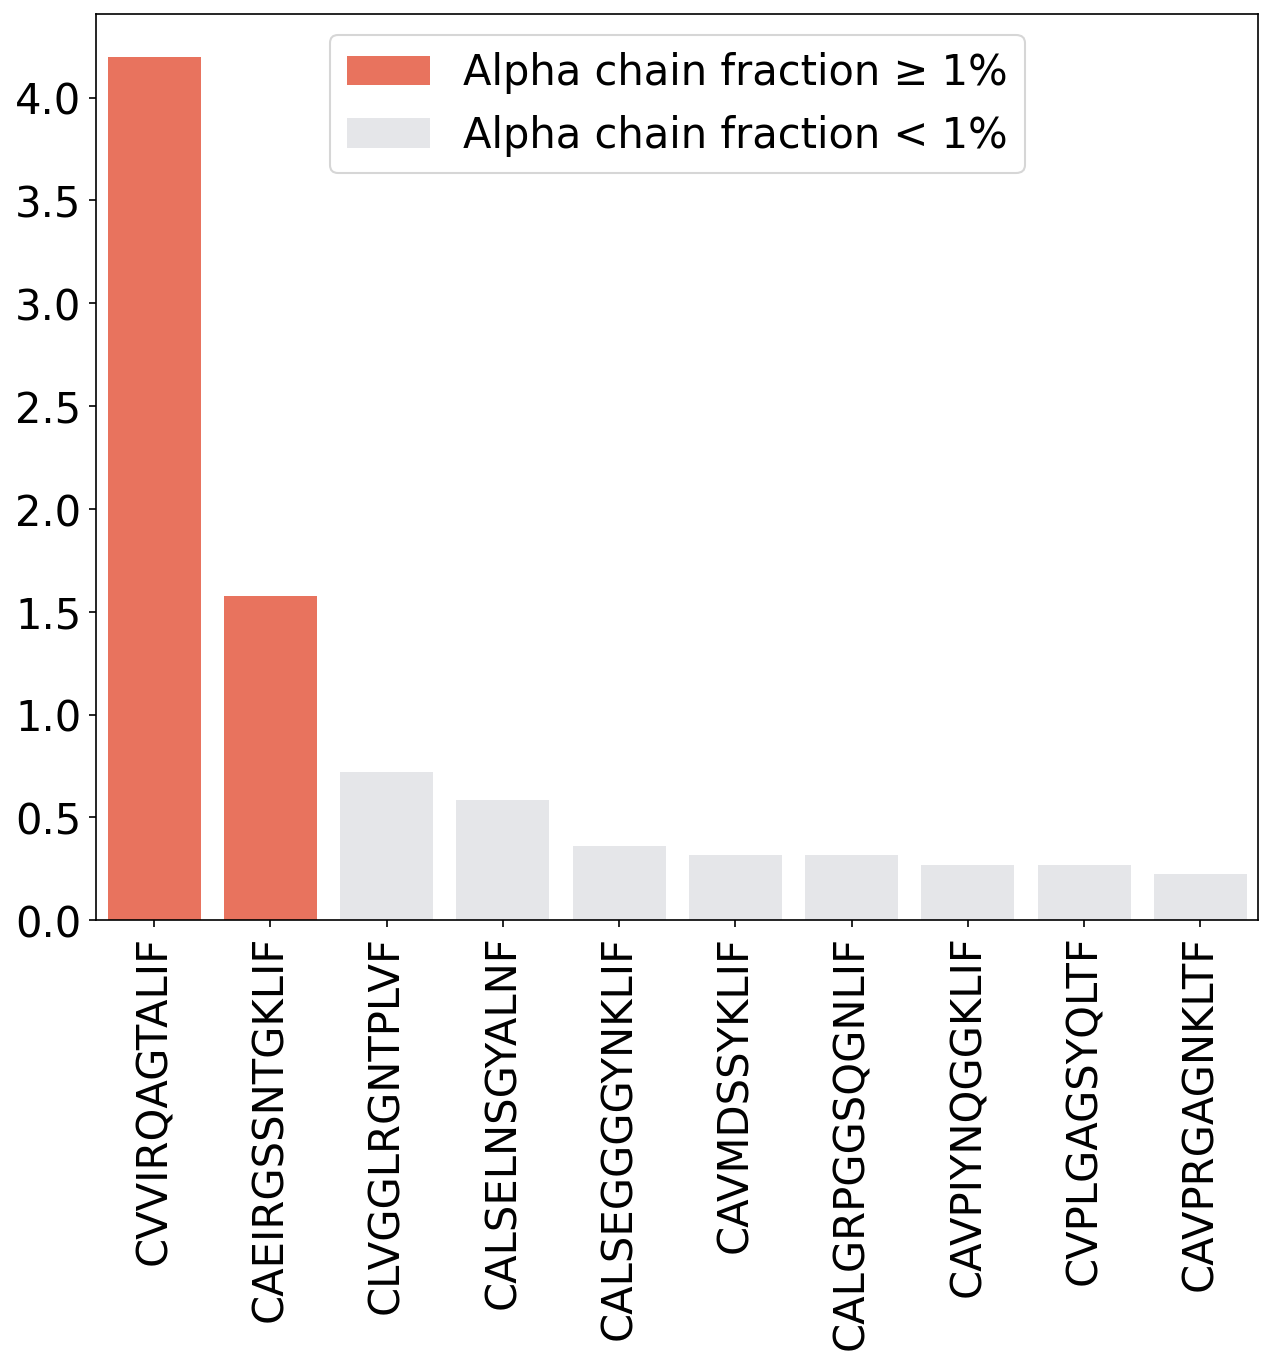

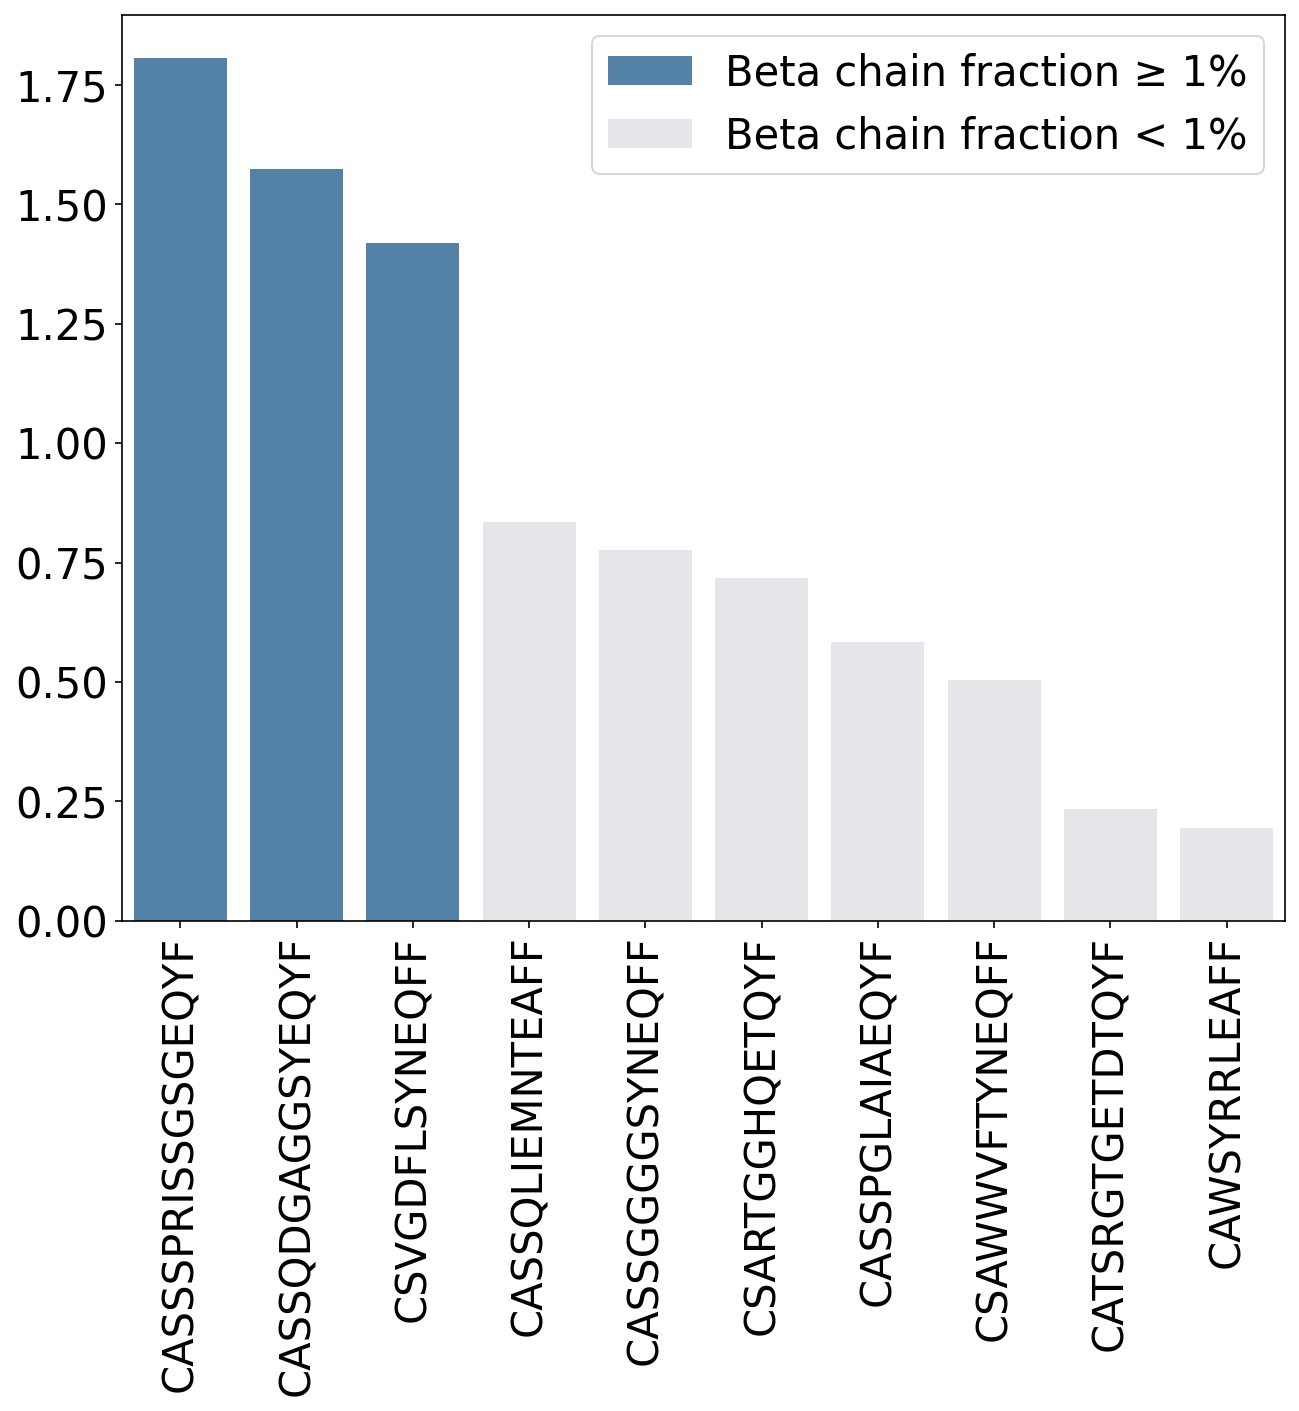

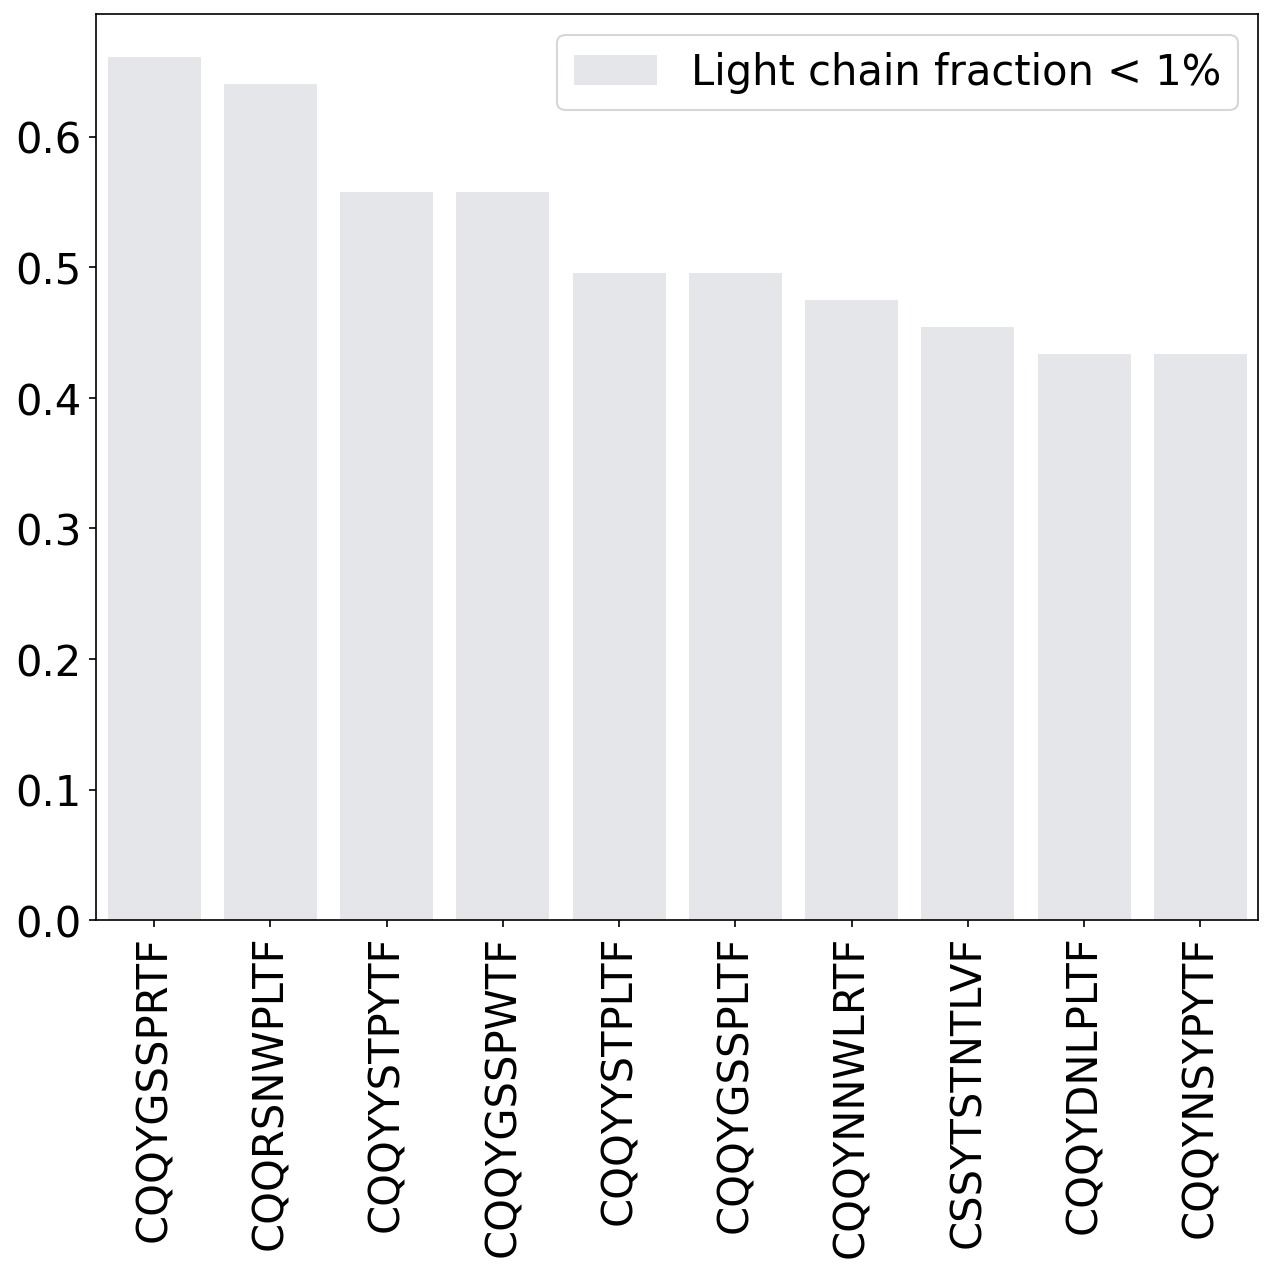

In [443]:
for chain in ['alpha', 'beta', 'heavy', 'light', 'kappa', 'lambda', 'IgM',  'IgG']:
    if chain in ['alpha', 'beta', 'gamma', 'delta']:
        df = df_tcr[:]
    else:
        df = df_bcr[:]
    top_clones_histogram(df,
                         10,
                         chain,
                         save_path,
                         material_type,
                         seq_type
                        )

# Fraction barplots

In [9]:
from Fraction_barplot_regular import *

49
52
51
53
53
50
51
51


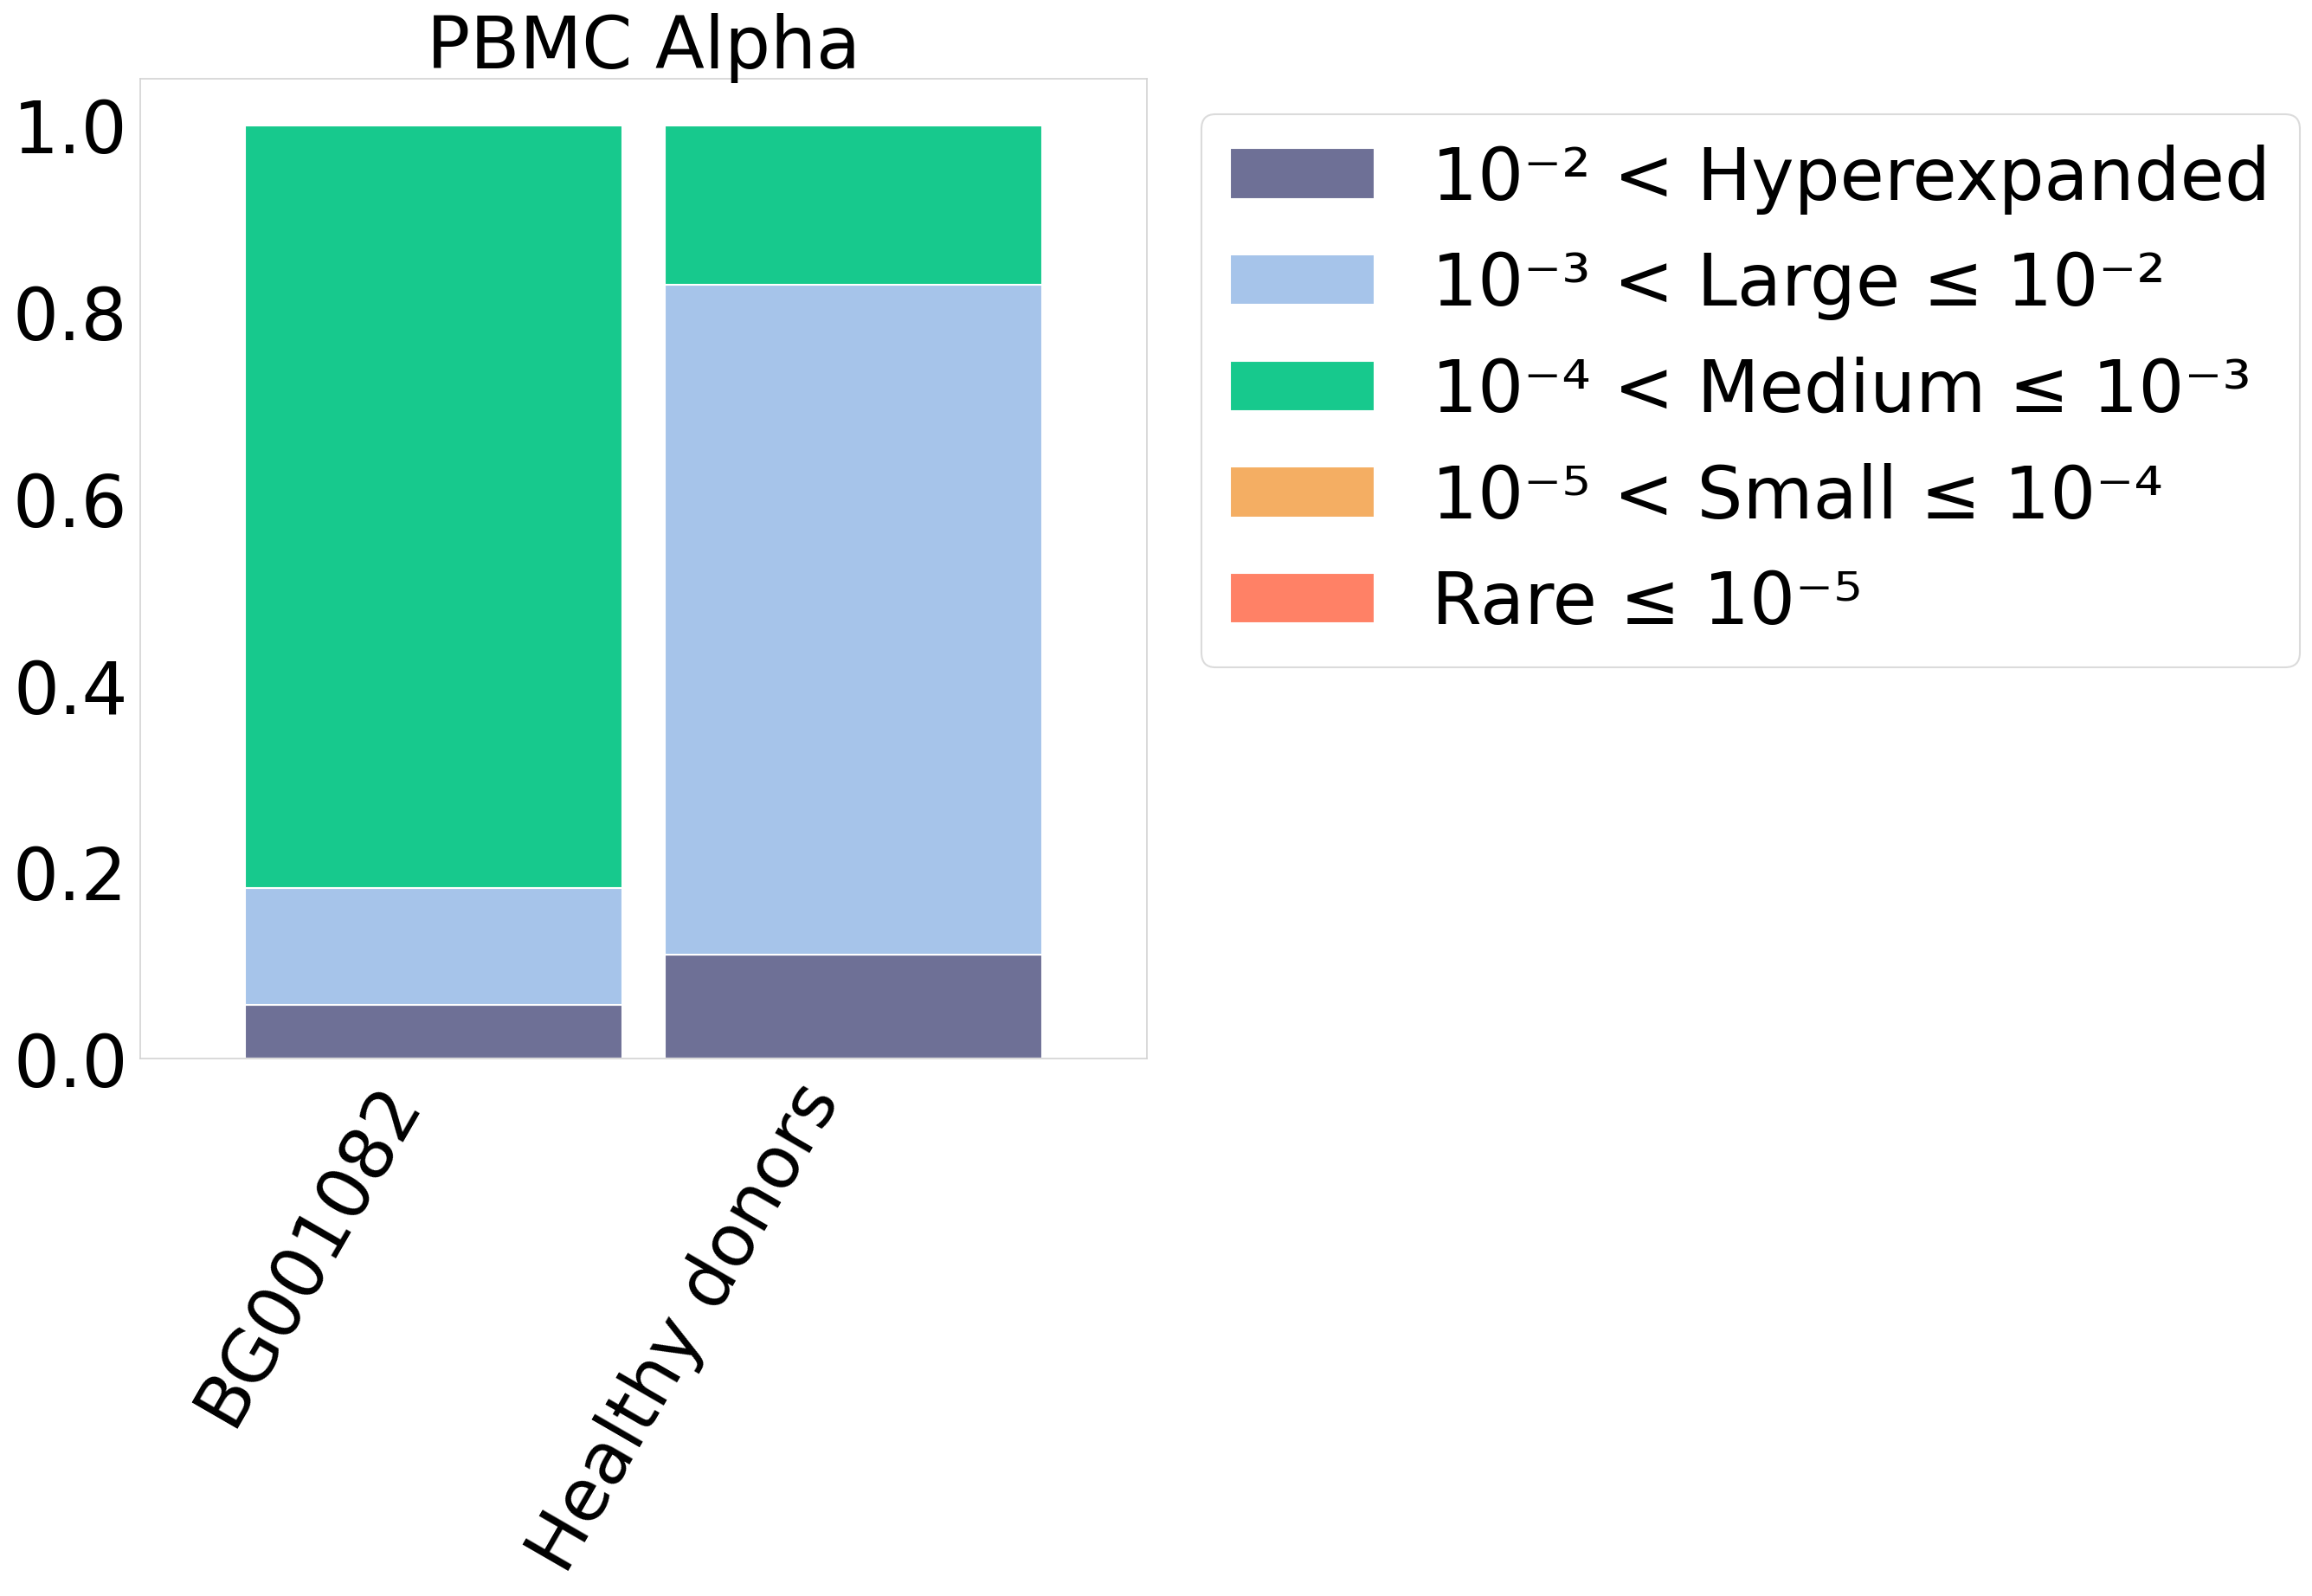

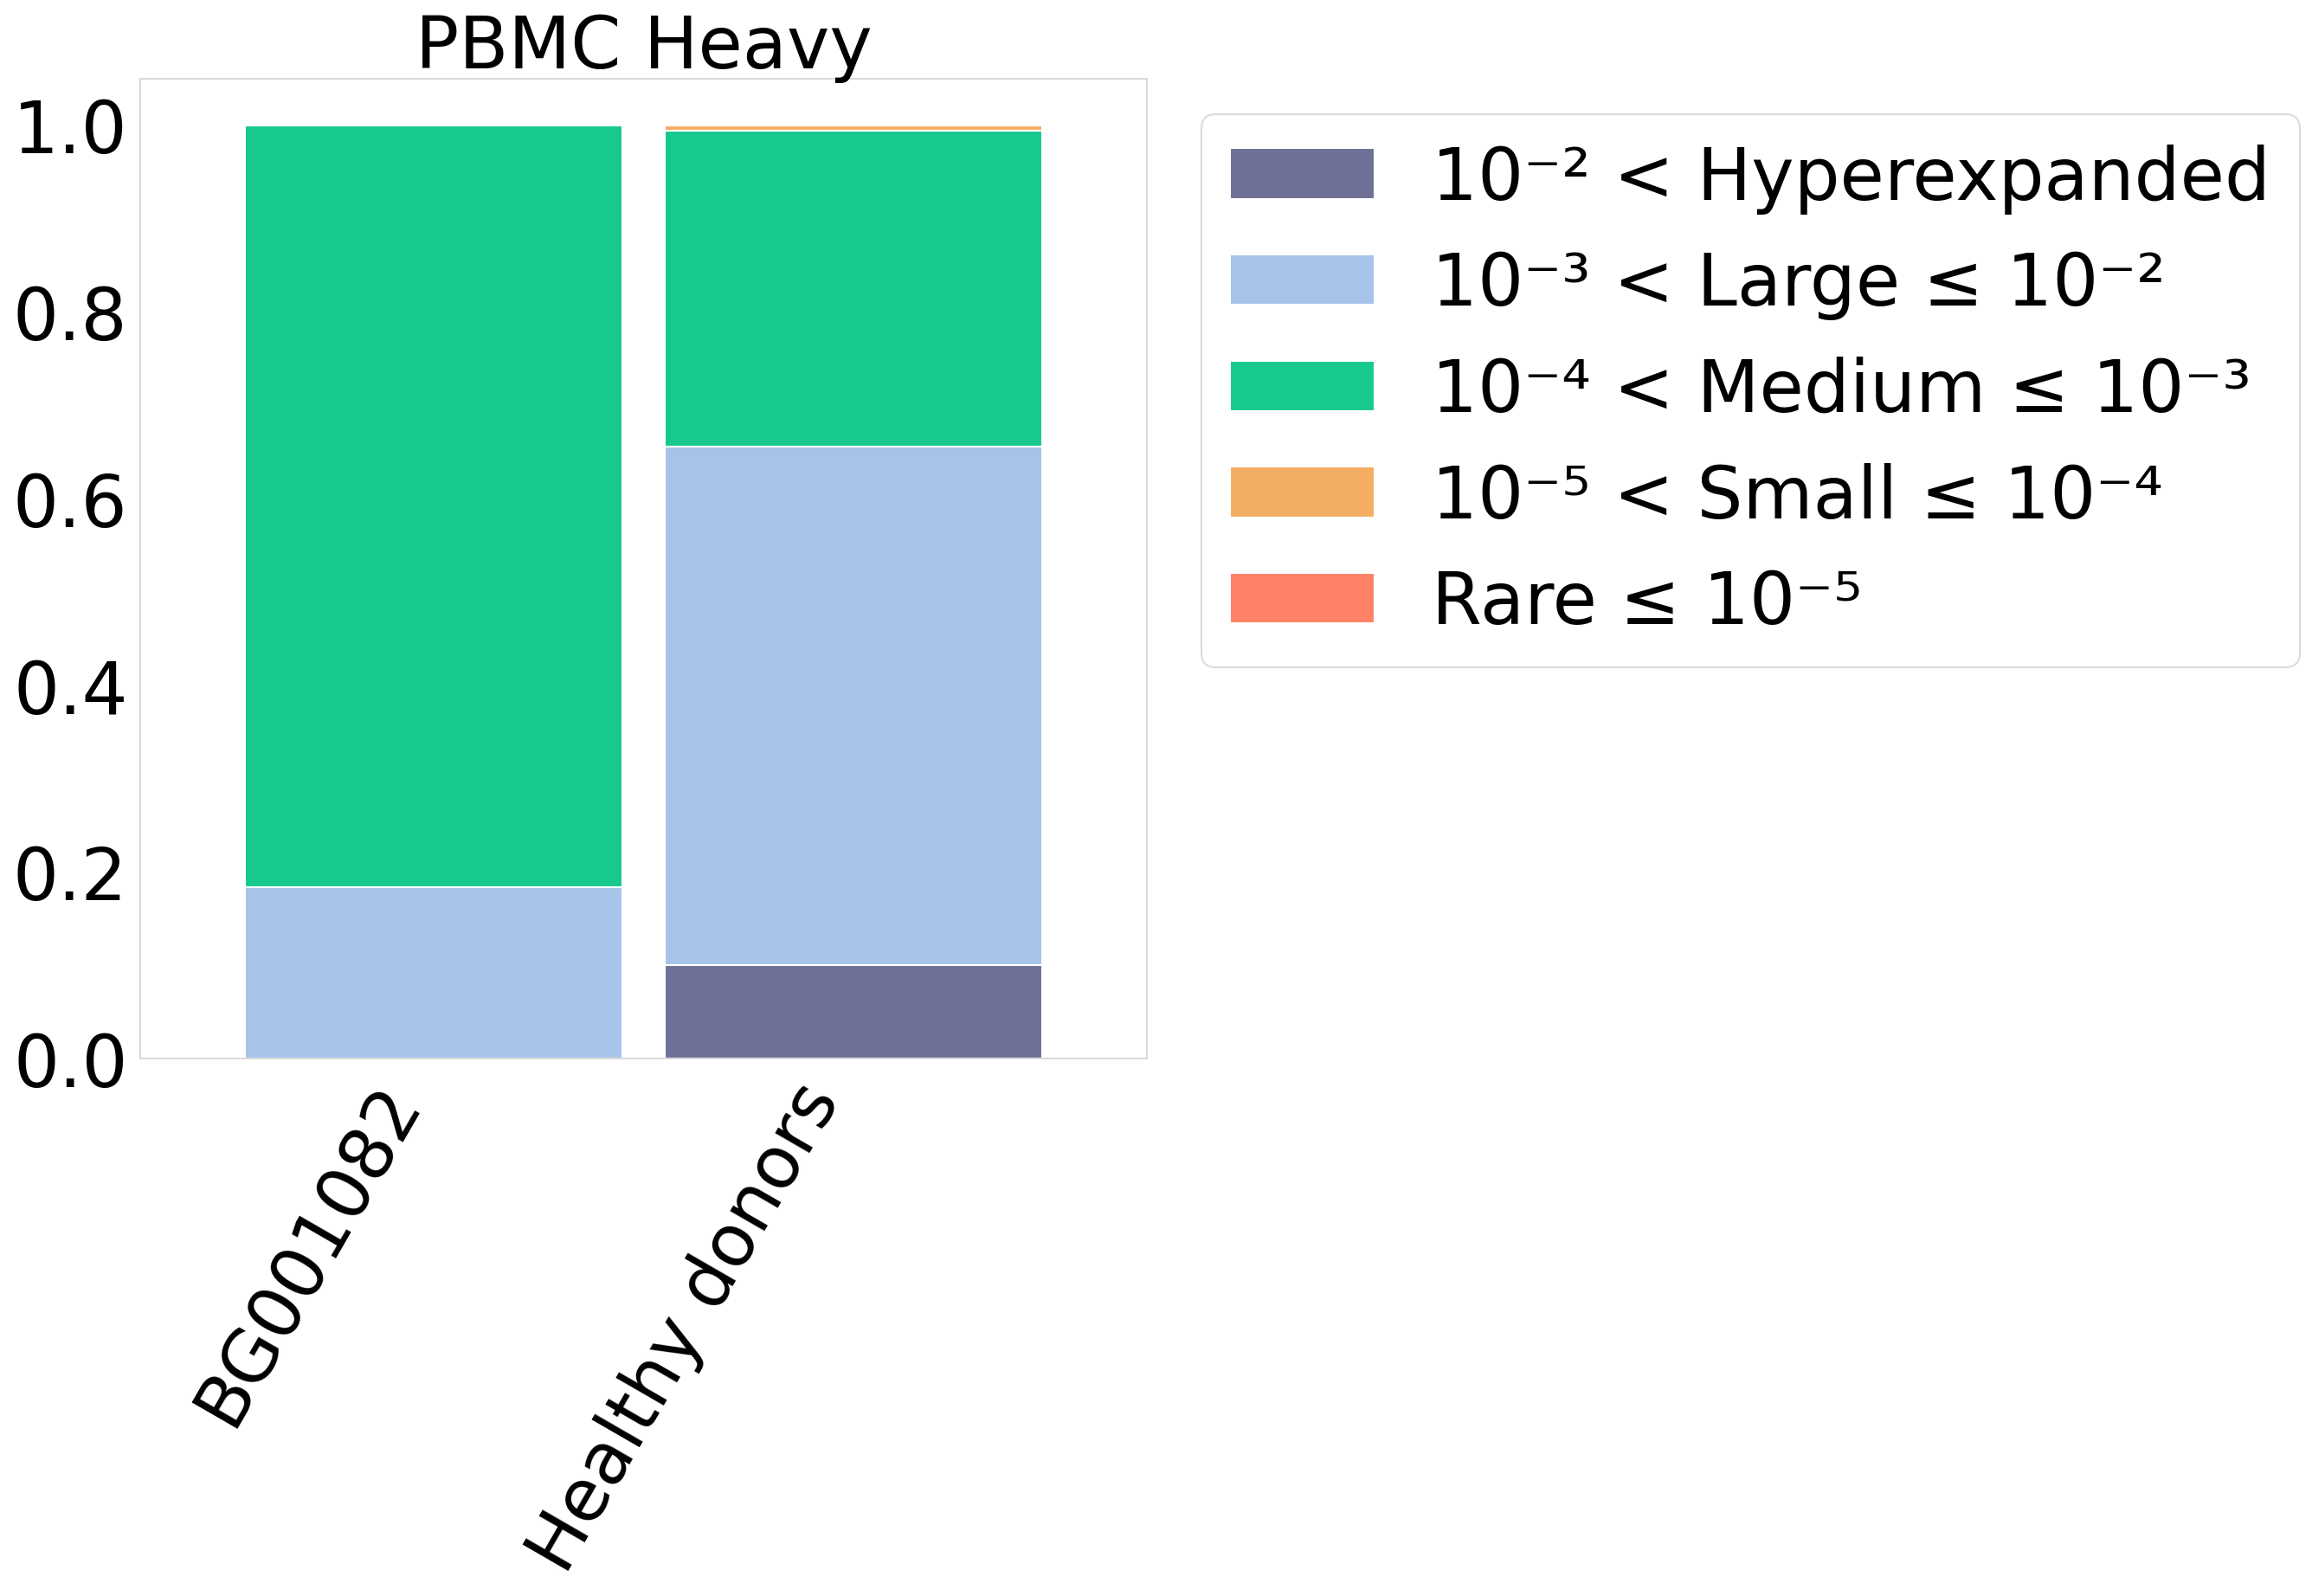

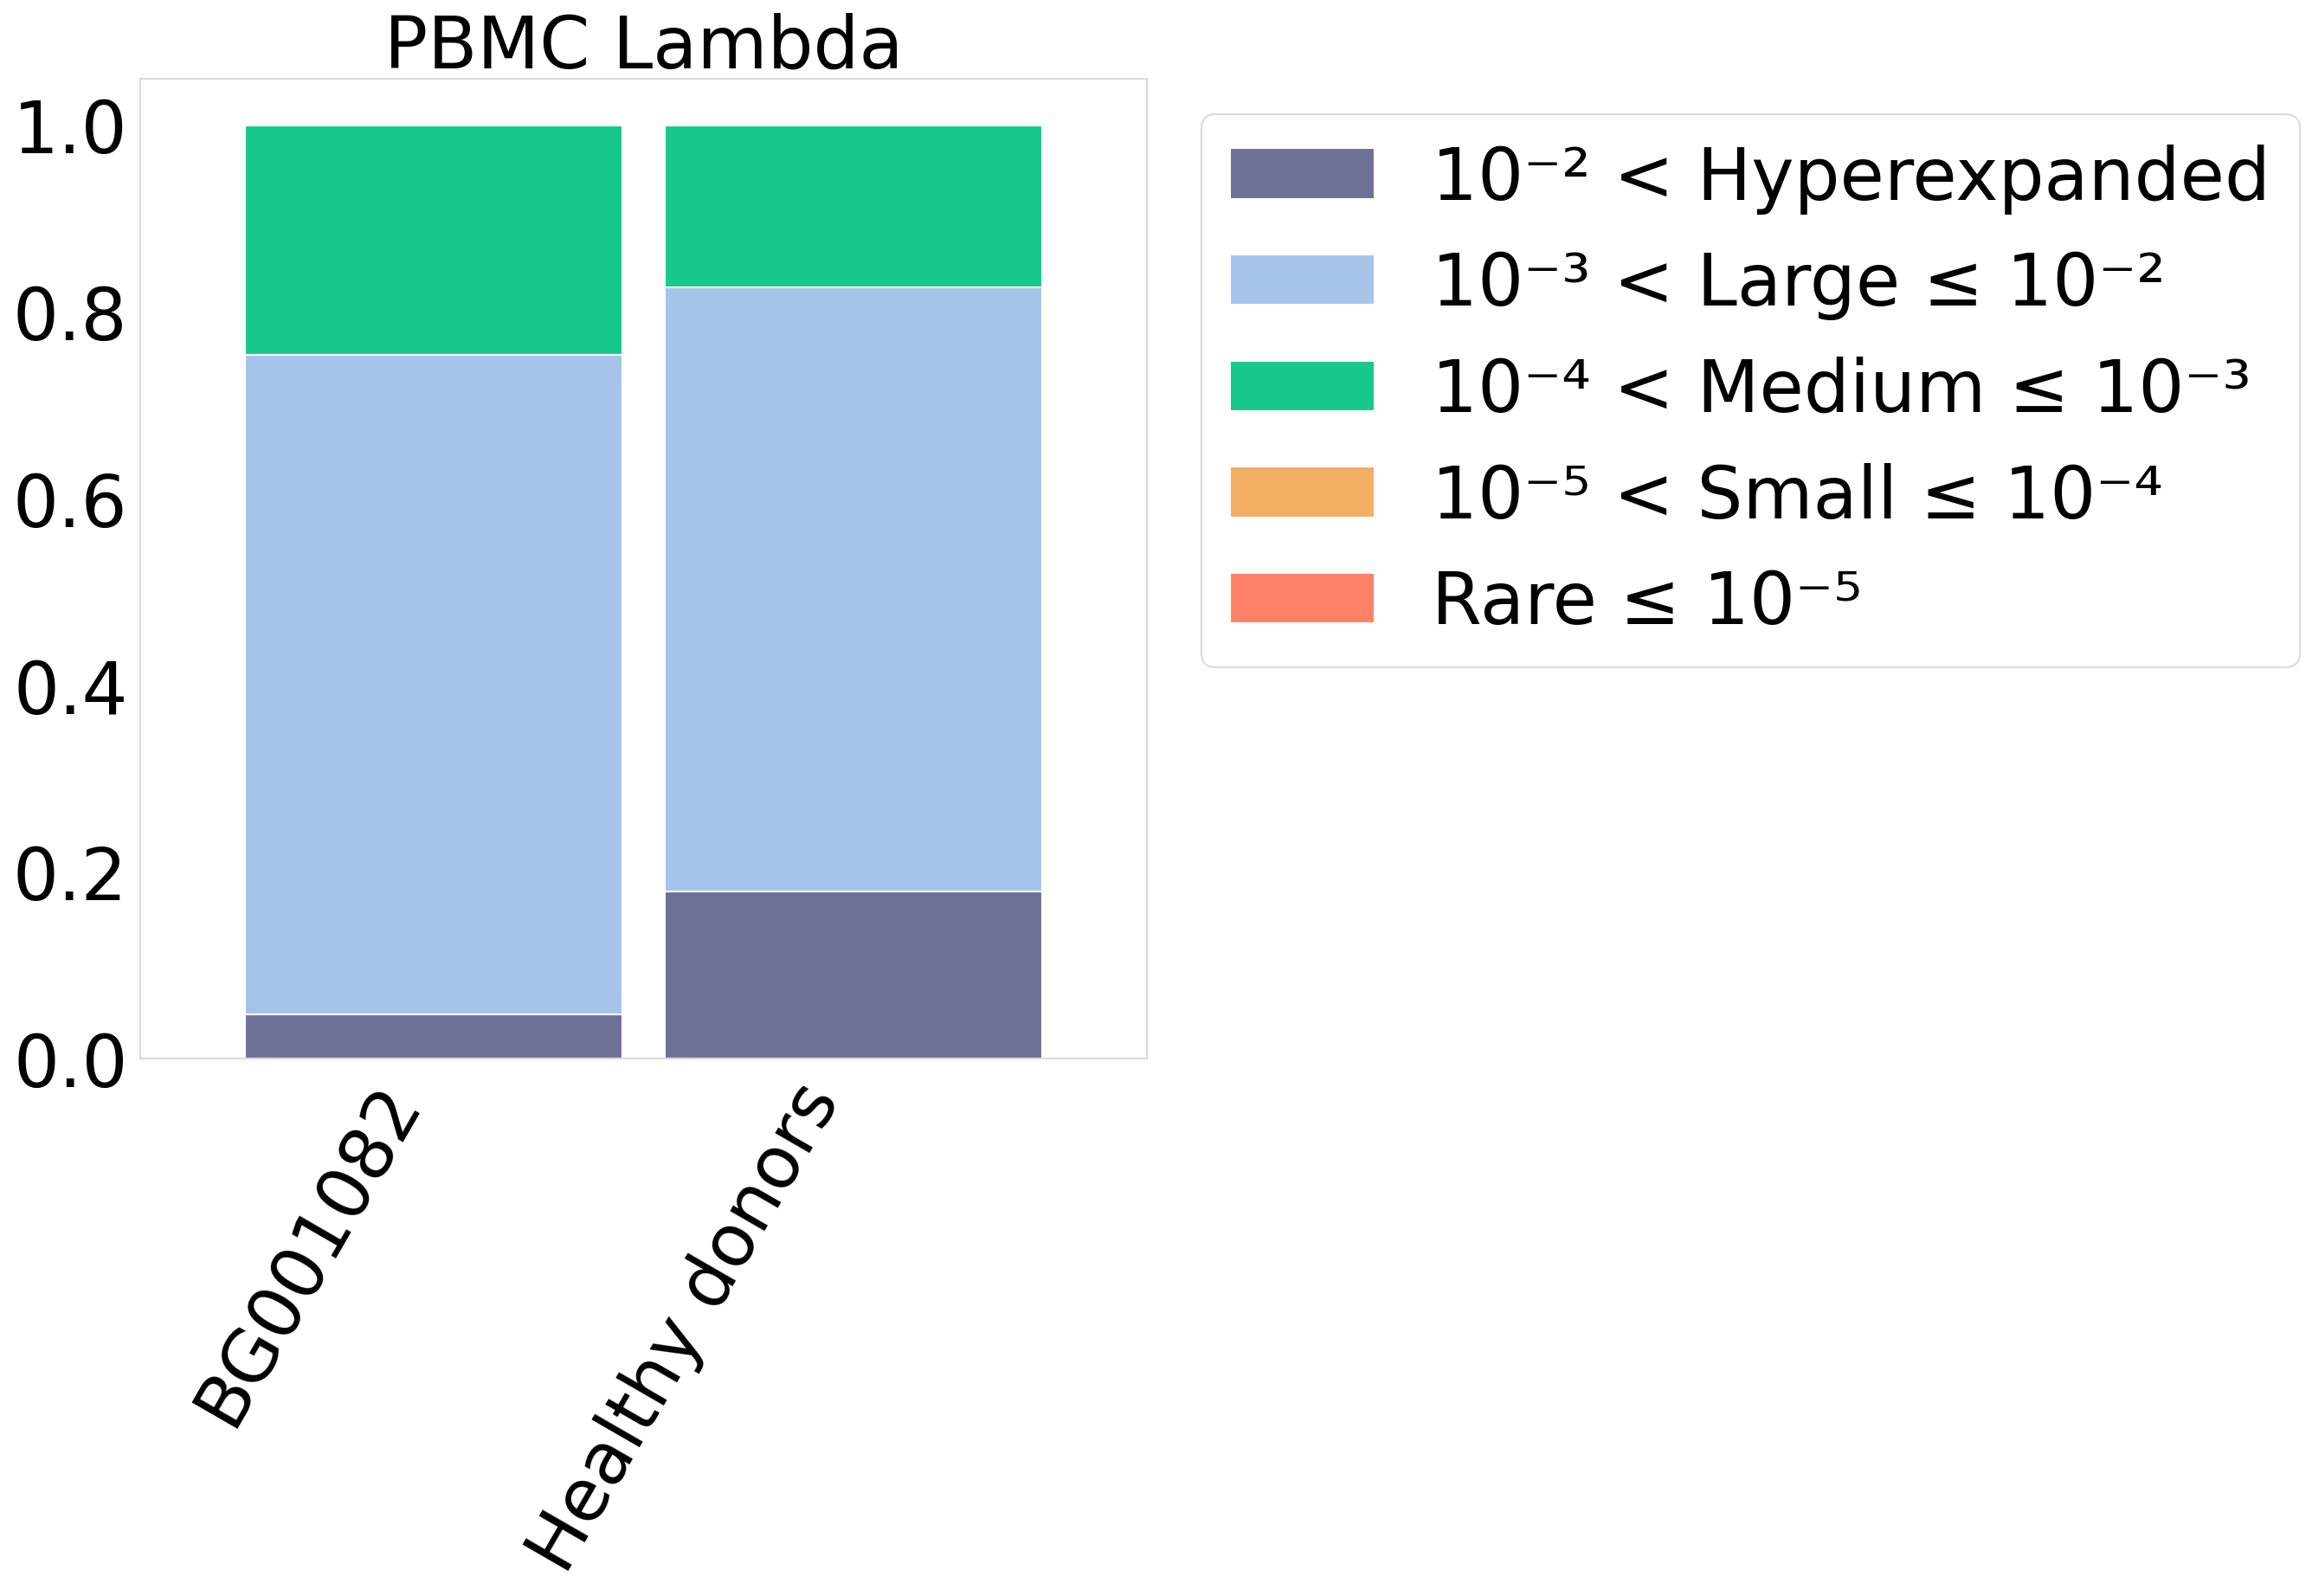

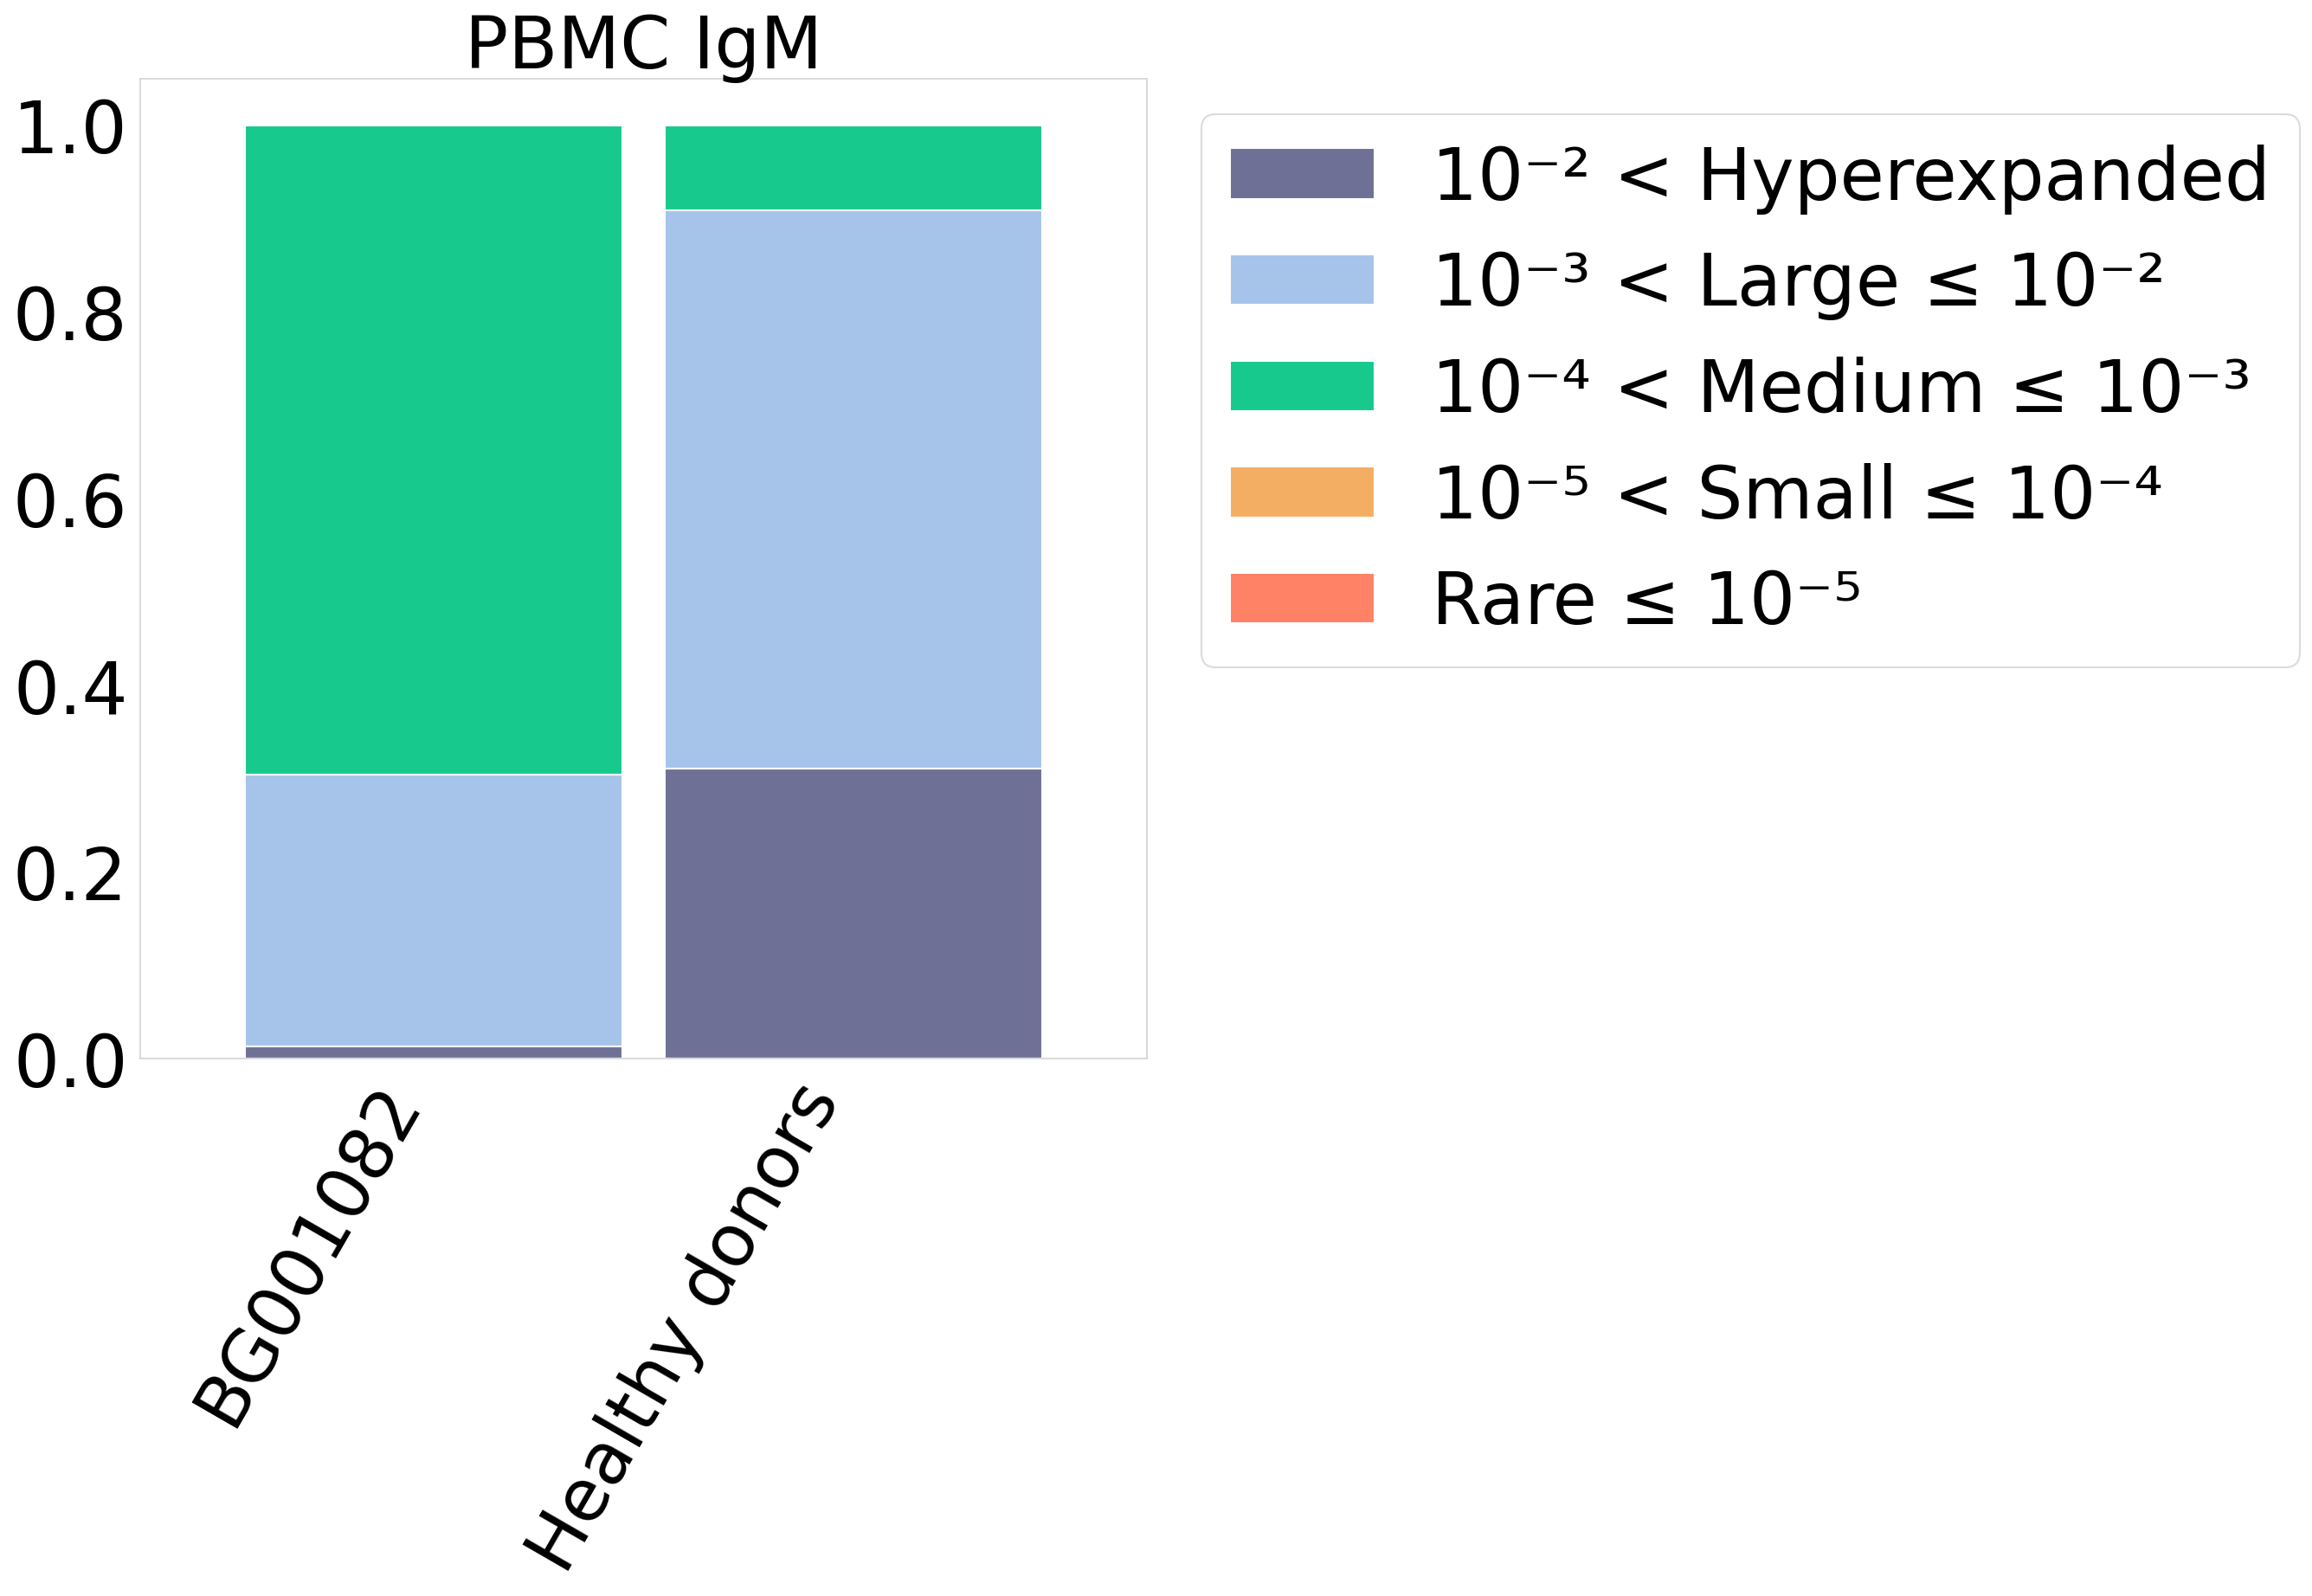

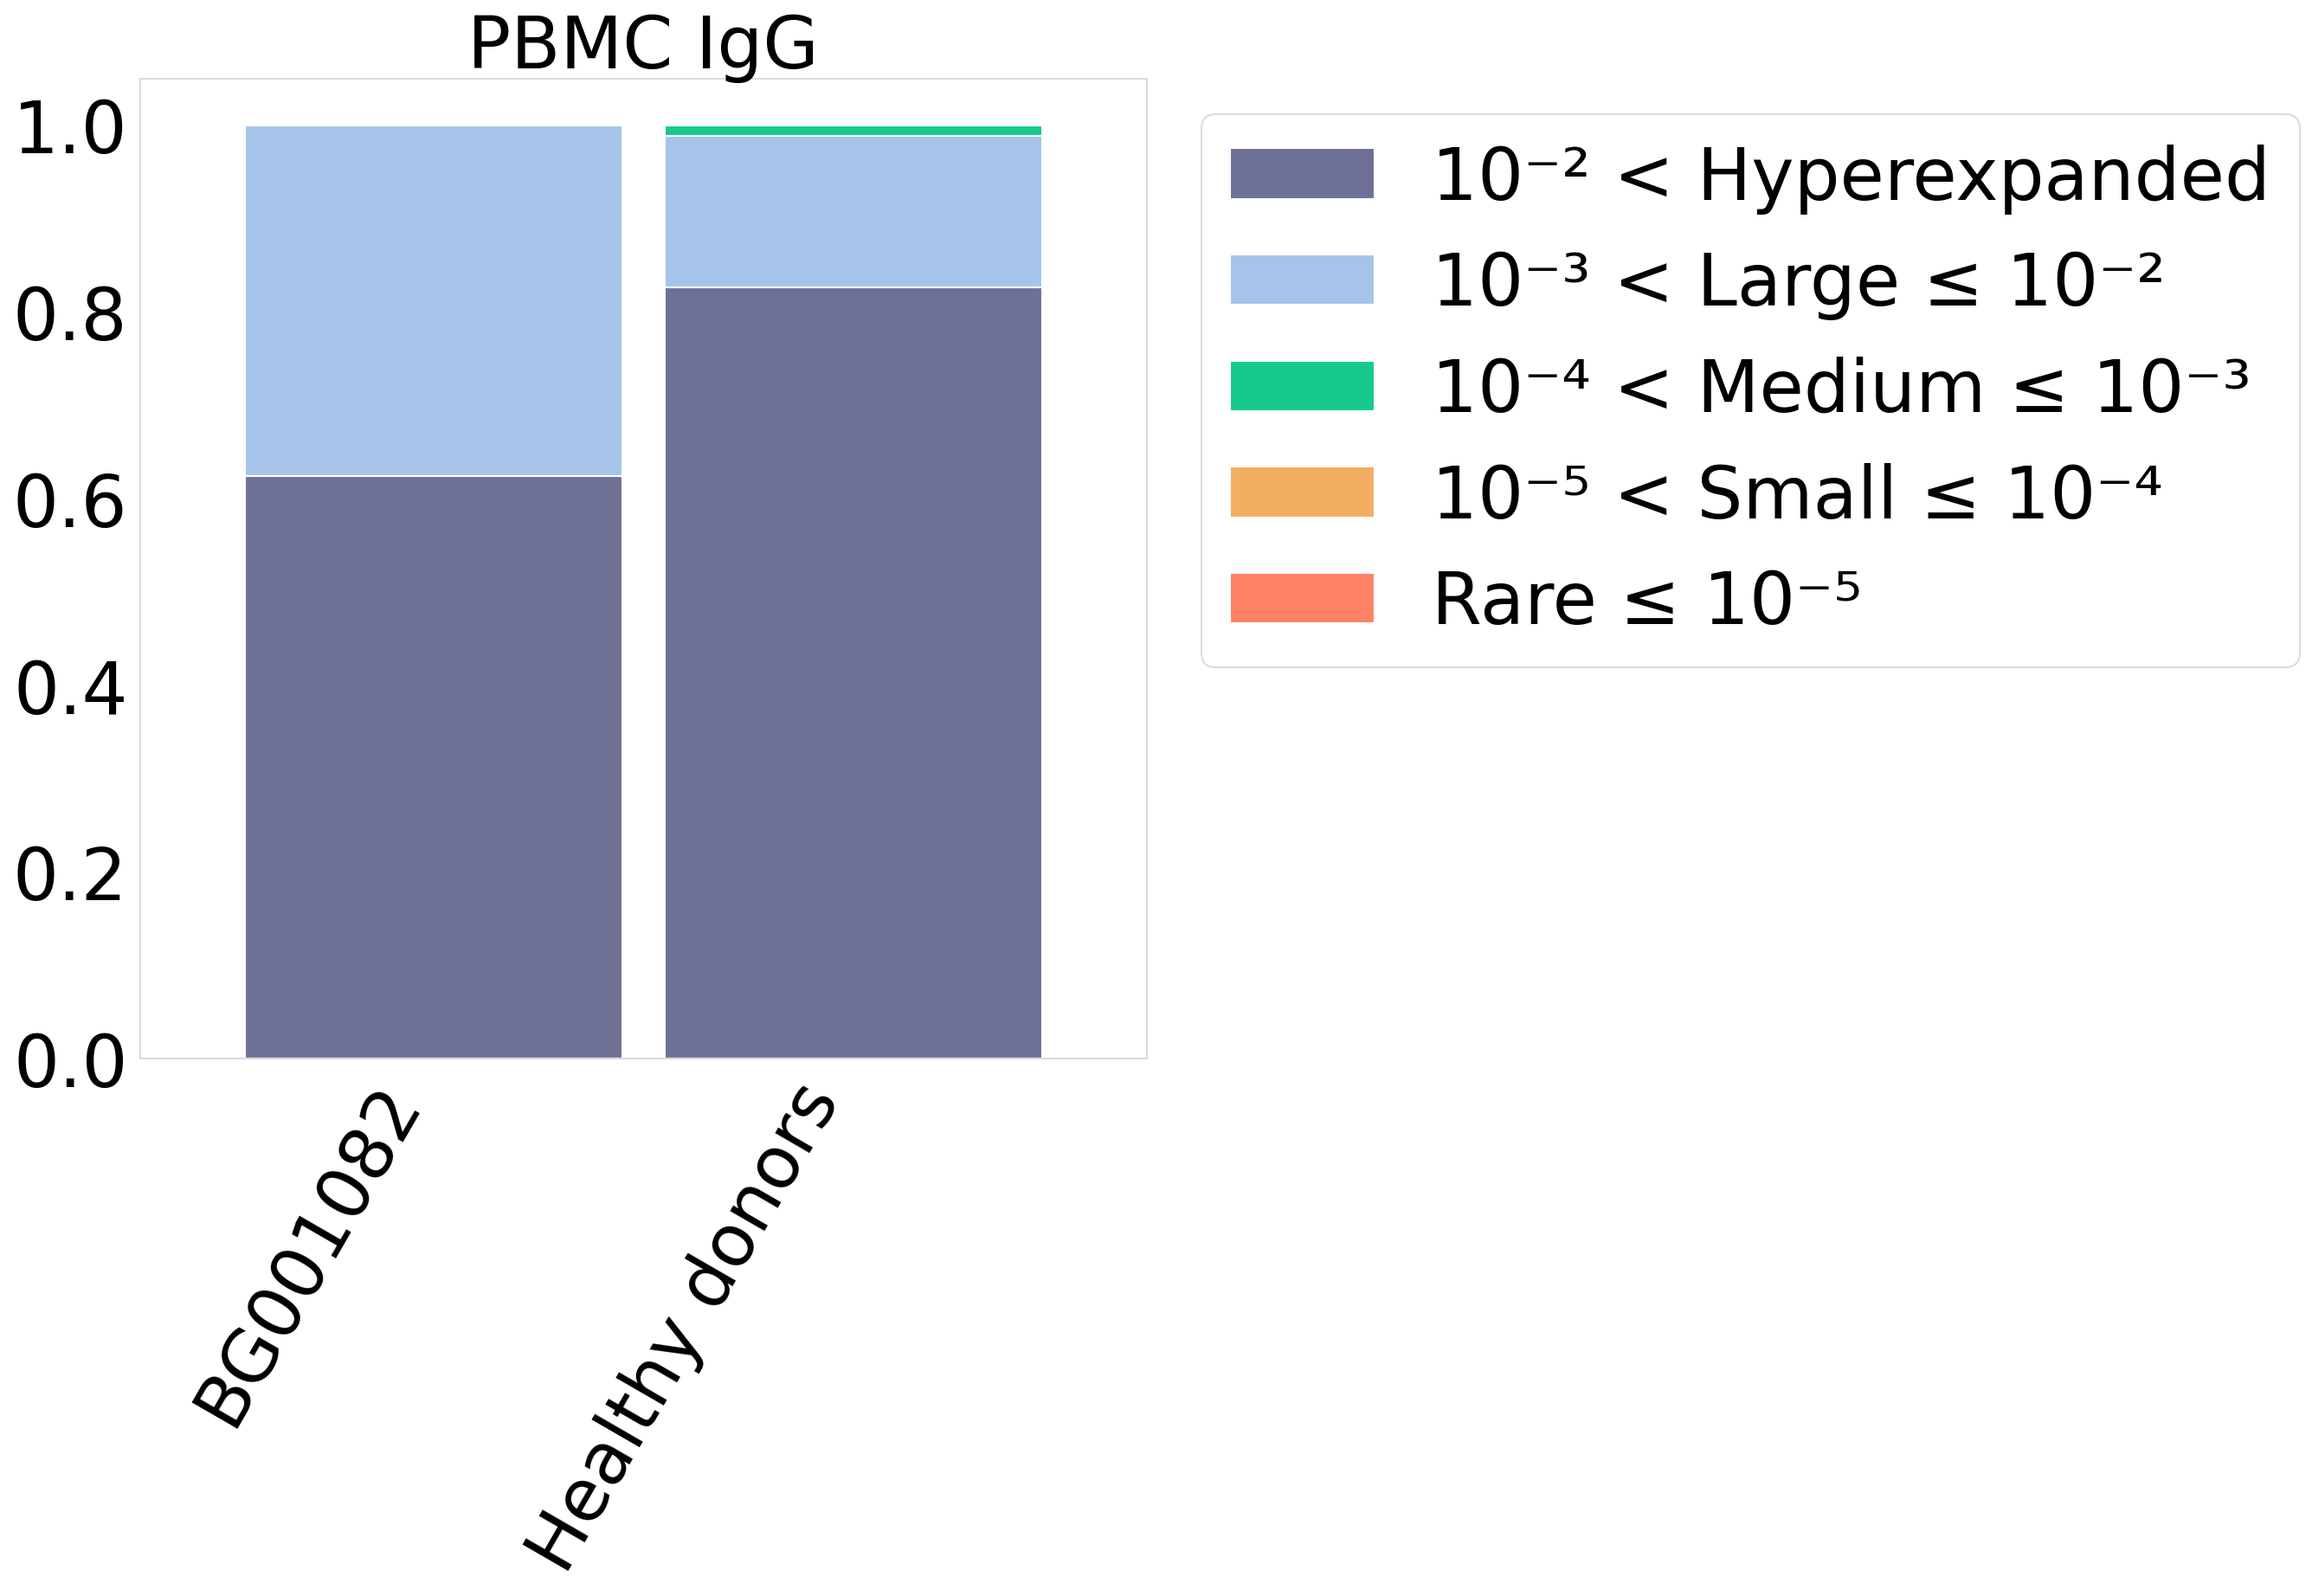

In [20]:
for chain in ['alpha', 'beta', 'heavy', 'light', 'kappa', 'lambda', 'IgM',  'IgG']:
    if chain in ['alpha', 'beta', 'gamma', 'delta']:
        df = df_tcr[:]
    else:
        df = df_bcr[:]

    fraction_barplot(df,
                     patient,
                     chain,
                     material_type,
                     save_path,
                     age=age,
                     healthy=True,
                     healthy_base='Blood',
                     seq_type=seq_type,
                     xticklabels=True,
                     yticklabels=True,
                     x_anchor=1.6,
                     DPI=150,
                     legend=True,
                     fontsize=40,
                     figsize=(10, 10),
                     edgecolor='lightgrey')
# for xcr in ['tcr_ab', 'bcr']:
#     single_sample_fraction_barplots(df,
#                                     patient,
#                                     save_path,
#                                     xcr,
#                                     seq_type,
#                                     material_type,
#                                     base='Blood')

# Statmetrics

In [436]:
from Statistic_calc_plot import *

In [432]:
# Clonality/Richness/Evenness
# Запустить перед отрисовкой, функция схранит файлы с референсами для tcr и bcr в save_path
statistic_reference_calc(seq_type, material_type, 'Healthy', 'Blood',
                         'bcr',
                         save_path, age)
statistic_reference_calc(seq_type, material_type, 'Healthy', 'Blood',
                         'tcr',
                         save_path, age)

In [437]:
# Запустит отрисовку по 4 таймпоинтам. Подхватит референс автоматически, если хочется передать свой референс, укажи путь до файла в параметре data_healthy.
# На данный момент функция не сохраняет результат в файл, всё сломалось из за переезда. На втором биомиксе должно работать.
statistic_plot(pathes_bcr, names, save_path, material_type, seq_type, ['heavy', 'kappa', 'lambda'], 'bcr', 20)
statistic_plot(pathes_tcr, names, save_path, material_type, seq_type, ['alpha', 'beta'], 'tcr', 20)

# Publics

In [397]:
from Top_clones_public_analysis import *

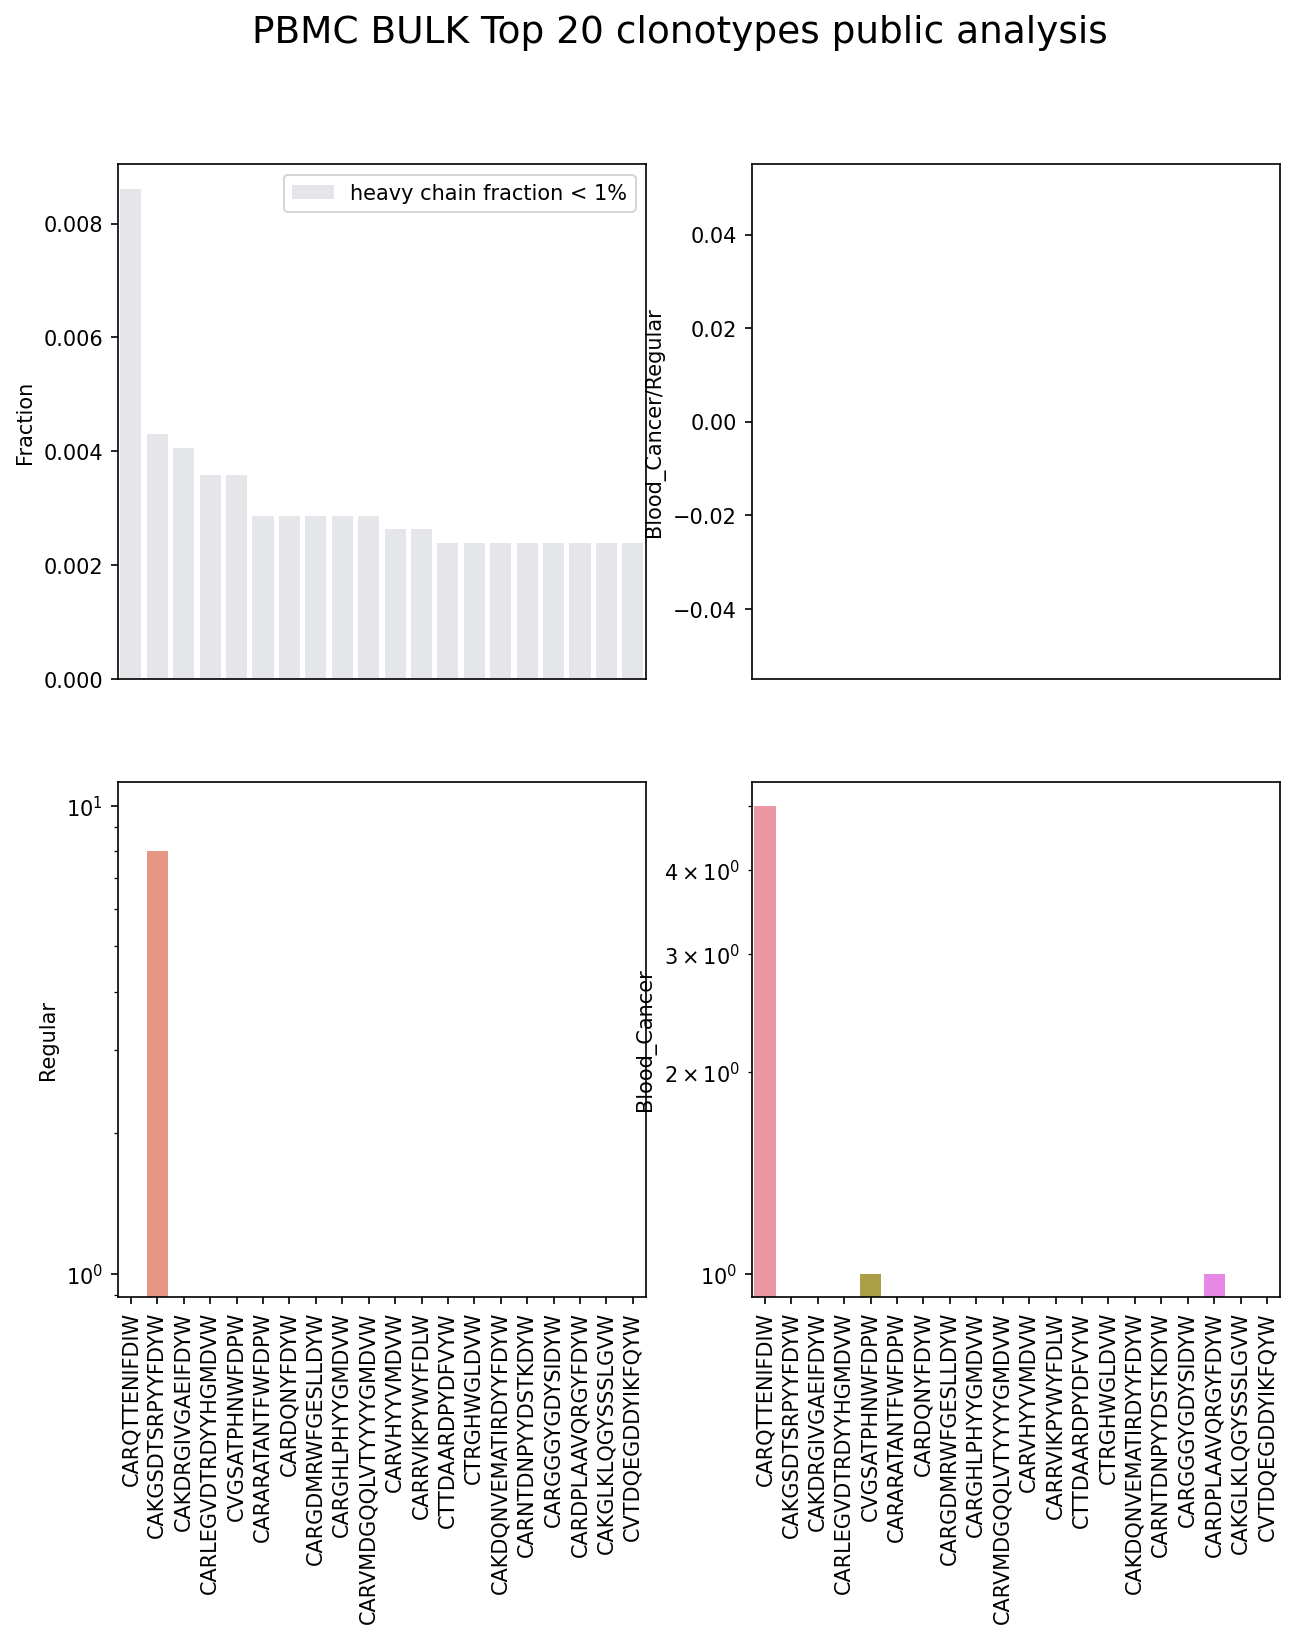

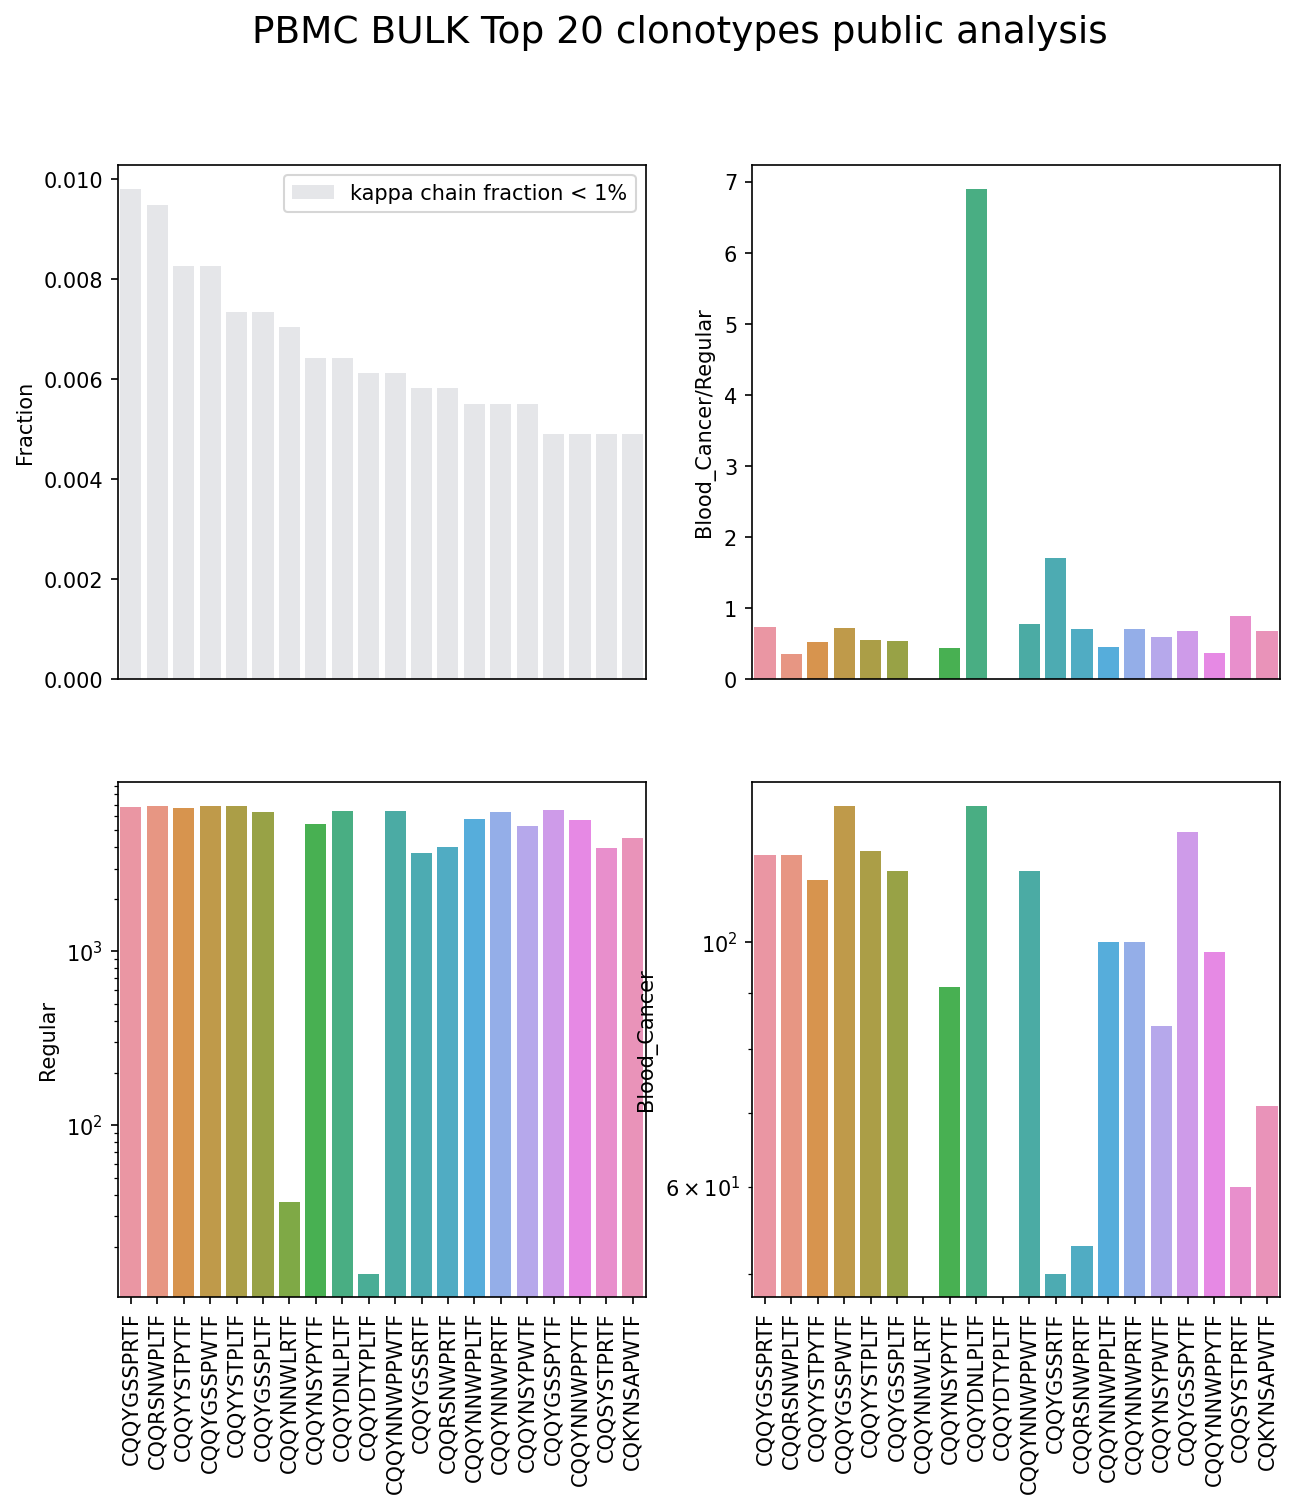

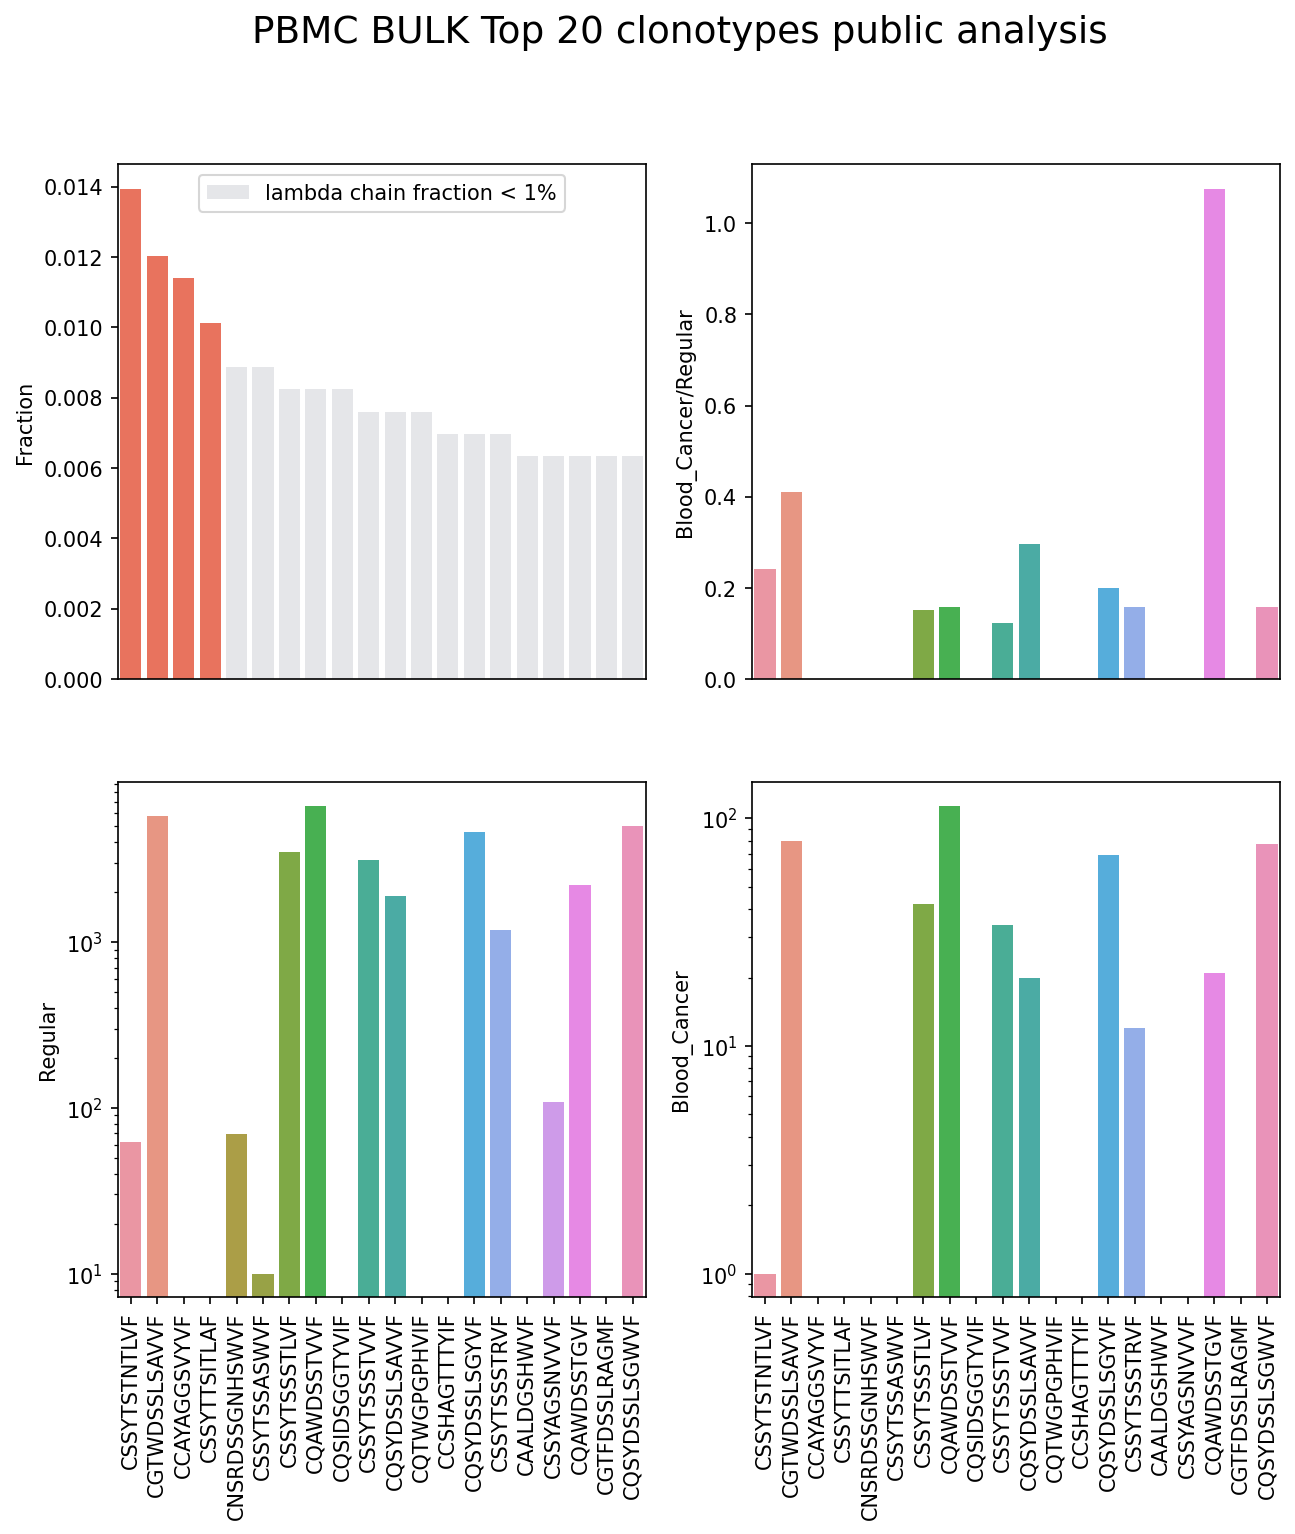

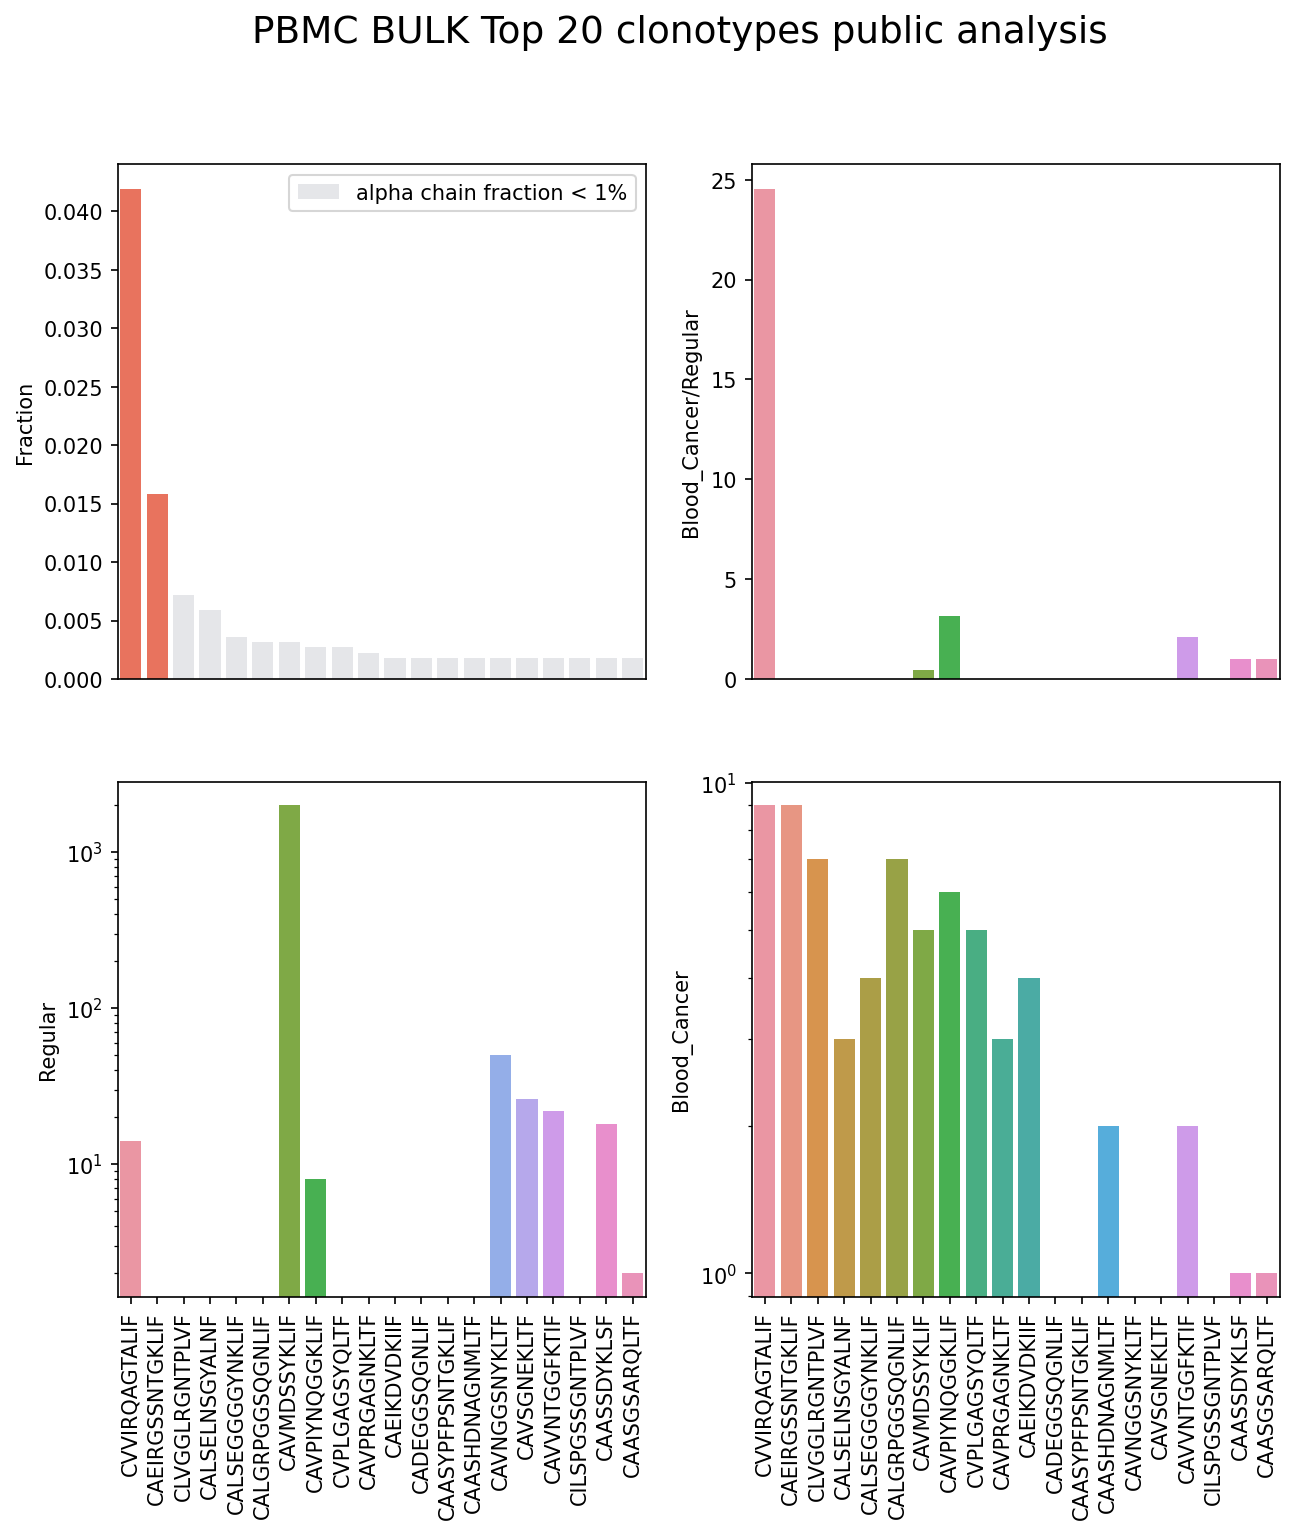

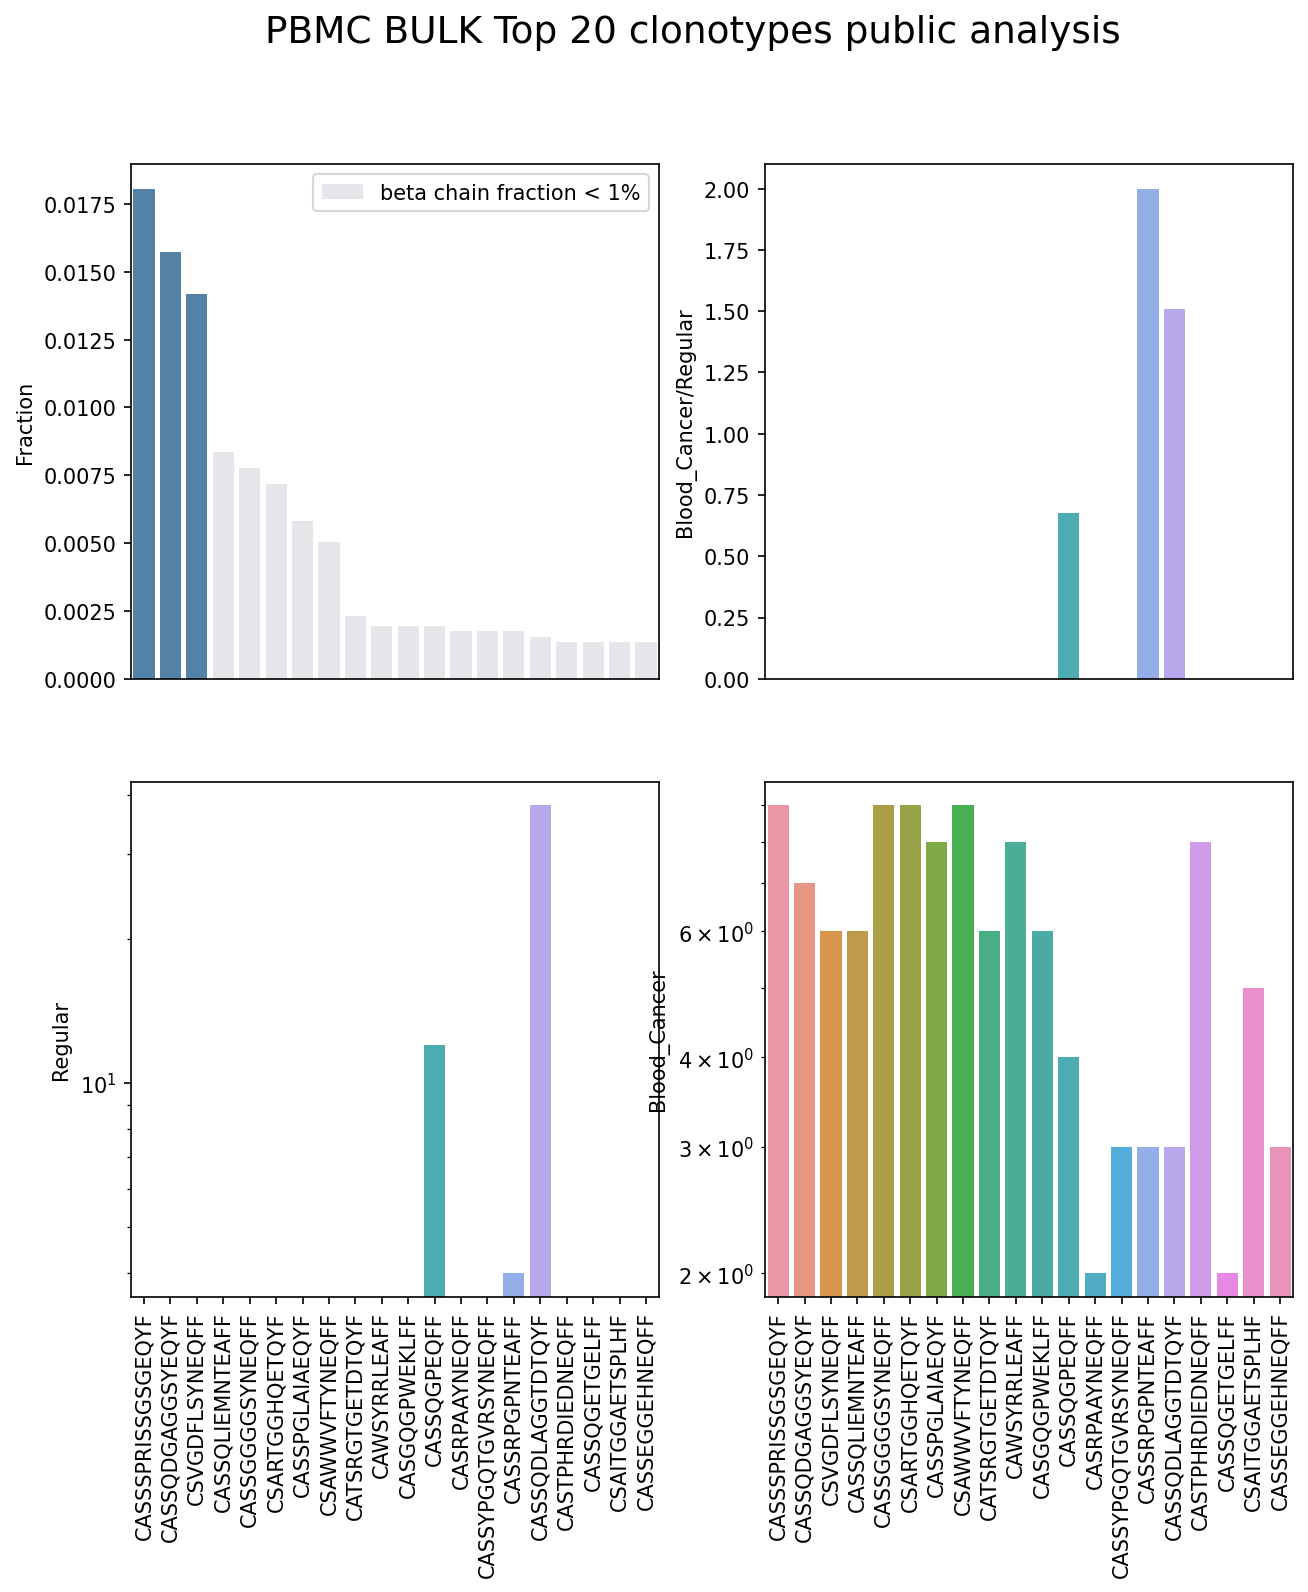

In [400]:
for chain in ['heavy', 'kappa', 'lambda']:
    df = df_bcr[:]
    top_clonotypes_public_analysis(df,
                                   chain,
                                   save_path,
                                   cohort_base,
                                   cohort_interest,
                                   20,
                                   material_type,
                                   seq_type,
                                   figsize=(10, 10),
                                   DPI=150)
for chain in ['alpha', 'beta']:
    df = df_tcr[:]
    top_clonotypes_public_analysis(df,
                                   chain,
                                   save_path,
                                   cohort_base,
                                   cohort_interest,
                                   20,
                                   material_type,
                                   seq_type,
                                   figsize=(10, 10),
                                   DPI=150)

# Tumor clones barplot

In [207]:
from Tumor_clone_time_points_histogtam import *

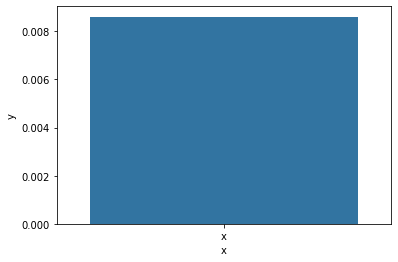

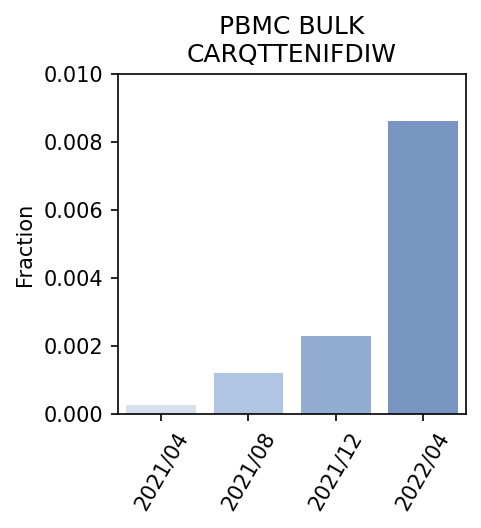

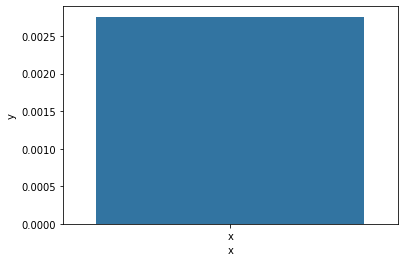

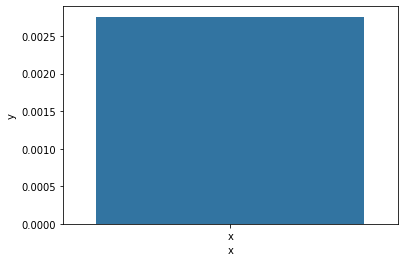

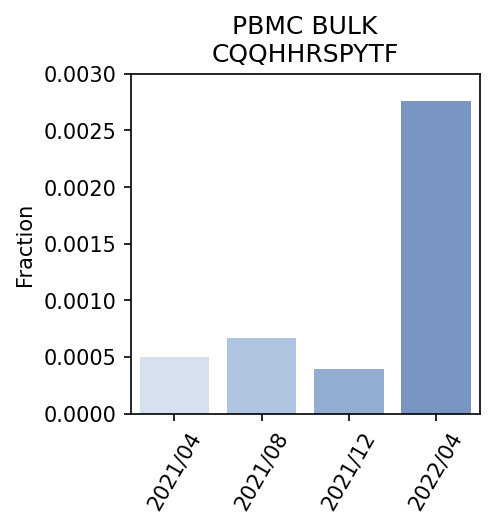

In [211]:
samples_lists = [pathes_bcr]
seq_types = ['BULK']
material_types = ['PBMC']
time_points = names

for tumor_clone_cdr3 in ['CARQTTENIFDIW', 'CQQHHSSPYTF', 'CQQHHRSPYTF']:
    tumor_clon_fraction_multyplot(samples_lists,
                                  time_points,
                                  tumor_clone_cdr3,
                                  material_types,
                                  seq_types,
                                  save_path,
                                  cdr3xx='cdr3aa')

# Assoc

In [403]:
from search_associations import *

In [411]:
# for one clonotype
assoc_tcr = pd.read_csv('/path/TCR_all.csv')
assoc_tcr_b = assoc_tcr.dropna(subset=['CDR3.beta.aa'])
assoc_tcr_a = assoc_tcr.dropna(subset=['CDR3.alpha.aa'])

len_first = len('cdr3_beta')
assoc_tcr_b['len_cdr'] = assoc_tcr_b['CDR3.beta.aa'].apply(lambda x: len(x))
assoc_tcr_b = assoc_tcr_b[assoc_tcr_b['len_cdr']==len_first]
assoc_tcr_b_first = assoc_tcr_b[assoc_tcr_b['CDR3.beta.aa'].apply(lambda x: hamming(x, 'cdr3_beta')<3)]
assoc_tcr_b_first = assoc_tcr_b[(assoc_tcr_b['Vbeta']=='TRBVXXX')&(assoc_tcr_b['Jbeta']=='TRBJcdr3_beta')]

len_first = len('cdr3_alpha')
assoc_tcr_a['len_cdr'] = assoc_tcr_a['CDR3.alpha.aa'].apply(lambda x: len(x))
assoc_tcr_a = assoc_tcr_a[assoc_tcr_a['len_cdr']==len_first]
assoc_tcr_a_first = assoc_tcr_a[assoc_tcr_a['CDR3.alpha.aa'].apply(lambda x: hamming(x, 'cdr3_alpha')<3)]
assoc_tcr_a_first = assoc_tcr_a[(assoc_tcr_a['Valpha']=='cdr3_alpha')&(assoc_tcr_a['Jalpha']=='cdr3_alpha')]

In [405]:
# for all clones
df_hla = pd.read_csv(
    'file_with_hla',
    sep='\t')
assoc_alpha = assoc_search(df_tcr,
                           df_hla,
                           'alpha',
                           'PBMC BULK BG001082',
                           inflation=2,
                           expansion=2,
                           pruning_threshold=0.001,
                           use_hla=True,
                           category=None)
assoc_beta = assoc_search(df_tcr,
                          df_hla,
                          'beta',
                          'PBMC BULK BG001082',
                          inflation=2,
                          expansion=2,
                          pruning_threshold=0.001,
                          use_hla=True,
                          category=None)

In [429]:
assoc_alpha

Disease    Epitope      HLA          cdr3aa  v_region  \
0     Epstein_Barr_Virus  GLCTLVAML  A*02:01     CAESLNARLMF     TRAV5   
1     Epstein_Barr_Virus  GLCTLVAML  A*02:01     CAESNNARLMF     TRAV5   
2     Epstein_Barr_Virus  GLCTLVAML  A*02:01     CAESPNARLMF     TRAV5   
3        Cytomegalovirus  NLVPMVATV  A*02:01     CAESPNARLMF     TRAV5   
4        Cytomegalovirus  KLGGALQAK  A*03:01     CAESGNARLMF     TRAV5   
...                  ...        ...      ...             ...       ...   
1325                 NaN        NaN      NaN  CAVSGPGGGNKLTF   TRAV8-6   
1326                 NaN        NaN      NaN  CIAYSGGGADGLTF  TRAV26-1   
1327  Epstein_Barr_Virus  GLCTLVAML  A*02:01  CIVYSGGGADGLTF  TRAV26-1   
1328  Epstein_Barr_Virus  GLCTLVAML  A*02:01     CAMSGYNKLIF  TRAV12-3   
1329                 NaN        NaN      NaN     CAMRGYNKLIF  TRAV12-3   

     j_region    Pubmed_id  Grade cdr3aa_length              vj_len  chain  \
0      TRAJ31     32184241   10.0            11     TRAV5 TRAJ31 11  alpha   
1      TRAJ31     32184241   10.0            11     TRAV5 TRAJ31 11  alpha   
2      TRAJ31     32184241   10.0            11     TRAV5 TRAJ31 11  alpha   
3      TRAJ31     28423320   20.0            11     TRAV5 TRAJ31 11  alpha   
4      TRAJ31  10xgenomics   11.0            11     TRAV5 TRAJ31 11  alpha   
...       ...          ...    ...           ...                 ...    ...   
1325   TRAJ10          NaN    NaN           NaN   TRAV8-6 TRAJ10 14  alpha   
1326   TRAJ45          NaN    NaN           NaN  TRAV26-1 TRAJ45 14  alpha   
1327   TRAJ45     32184241   10.0            14  TRAV26-1 TRAJ45 14  alpha   
1328    TRAJ4     32184241   10.0            11   TRAV12-3 TRAJ4 11  alpha   
1329    TRAJ4          NaN    NaN           NaN   TRAV12-3 TRAJ4 11  alpha   

                  Source  fraction  n_cluster          associations  
0                   base       NaN          3                   NaN  
1                   base       NaN          3                   NaN  
2                   base       NaN          3                   NaN  
3                   base       NaN          3                   NaN  
4                   base       NaN          3                   NaN  
...                  ...       ...        ...                   ...  
1325  PBMC BULK BG001082  0.000451       4415  [Epstein_Barr_Virus]  
1326  PBMC BULK BG001082  0.000451       4500  [Epstein_Barr_Virus]  
1327                base       NaN       4500                   NaN  
1328                base       NaN       4505                   NaN  
1329  PBMC BULK BG001082  0.000902       4505  [Epstein_Barr_Virus]  

[1330 rows x 15 columns]

In [409]:
df_tcr

cdr3aa                                         cdr3nt  \
0       CVVIRQAGTALIF        TGTGTGGTGATACGGCAGGCAGGAACTGCTCTGATCTTT   
1     CAEIRGSSNTGKLIF  TGTGCAGAGATAAGGGGCTCTAGCAACACAGGCAAACTAATCTTT   
2      CLVGGLRGNTPLVF     TGCCTCGTGGGGGGGTTACGCGGAAACACACCTCTTGTCTTT   
3      CALSELNSGYALNF     TGTGCTCTGAGTGAATTGAATTCCGGGTATGCACTCAACTTC   
4     CALSEGGGGYNKLIF  TGTGCTCTGAGTGAGGGCGGTGGTGGCTACAATAAGCTGATTTTT   
...               ...                                            ...   
5294    CATWEGGDWIKTF        TGTGCCACCTGGGAAGGAGGTGATTGGATCAAGACGTTT   
5295  CATWDGRGSDWIKTF  TGTGCCACCTGGGACGGGCGTGGTAGTGATTGGATCAAGACTTTT   
5296     CATWDKRDKKLF           TGTGCCACCTGGGATAAGAGGGACAAGAAACTCTTT   
5297   CALWEMVSDWIKTF     TGTGCCTTGTGGGAGATGGTTAGTGATTGGATCAAGACGTTT   
5298    CALWEGTSWFKIF        TGTGCCTTGTGGGAGGGGACGTCCTGGTTCAAGATATTT   

      clonotype_id  fraction  clonotype_count  cdr3nt_length  chain  v_region  \
0                1  0.041949             93.0             39  alpha  TRAV12-1   
1                9  0.015787             35.0             45  alpha  TRAV13-2   
2               14  0.007217             16.0             42  alpha     TRAV4   
3               18  0.005864             13.0             42  alpha   TRAV9-2   
4               31  0.003608              8.0             45  alpha    TRAV19   
...            ...       ...              ...            ...    ...       ...   
5294          5520  0.003861              1.0             39  gamma     TRGV2   
5295          5503  0.003861              1.0             45  gamma     TRGV2   
5296          5534  0.003861              1.0             36  gamma    TRGV5P   
5297          5537  0.003861              1.0             42  gamma     TRGV9   
5298          5566  0.003861              1.0             39  gamma     TRGV9   

     d_region j_region  ...              fr2aa  \
0         NaN   TRAJ15  ...  FFWYRQDCRKEPKLLMS   
1         NaN   TRAJ37  ...  FIWYKQESGKGPQFIID   
2         NaN   TRAJ29  ...  ITWYQQFPSQGPRFIIQ   
3         NaN   TRAJ41  ...  lfwyvqypgeGLQLLLK   
4         NaN    TRAJ4  ...  lfwykqppsgelvflir   
...       ...      ...  ...                ...   
5294      NaN   TRGJP2  ...  ihwylhqegkapqrlqy   
5295      NaN   TRGJP2  ...  ihwylhqegkapqrlqy   
5296      NaN    TRGJ2  ...  ihwylqqegktpqhllh   
5297      NaN   TRGJP2  ...  vywyrerpgeviqflvs   
5298      NaN   TRGJP1  ...  vywyrerpgeviqflvs   

                                                  fr2nt  \
0     TTCTTCTGGTACAGACAGGATTGCAGGAAAGAACCTAAGTTGCTGA...   
1     TTCATTTGGTACAAGCAAGAATCTGGAAAAGGTCCTCAATTCATTA...   
2     ATCACGTGGTACCAACAGTTTCCCAGCCAAGGACCACGATTTATTA...   
3     cttttctggtatgtccaatatcctggagaaGGTCTACAGCTCCTCC...   
4     ttattctggtacaagcaaccaccaagtggagaattggttttcctta...   
...                                                 ...   
5294  atccactggtacctacaccaggaggggaaggccccacagcgtcttc...   
5295  atccactggtacctacaccaggaggggaaggccccacagcgtcttc...   
5296  atccactggtacctacagcaggaggggaagaccccacagcatcttc...   
5297  gtatattggtatcgagagagacctggtgaagtcatacagttcctgg...   
5298  gtatattggtatcgagagagacctggtgaagtcatacagttcctgg...   

                                       fr3aa  \
0          NEDGRFTAQLNRASQYISLLIRDSKLSDSATYL   
1          RQGQRVTVLLNKTVKHLSLQIAATQPGDSAVYF   
2          VTNEVASLFIPADRKSSTLSLPRVSLSDTAVYY   
3          GSNKGFEATYRKETTSFHLEKGSVQVSDSAVYF   
4          EISGRYSWNFQKSTSSFNFTITASQVVDSAVYF   
...                                      ...   
5294   vlesgvspgkyytyastrnnlrlilrnliendfgvyy   
5295   vlesgvspgkyytyastrnnlrlilrnliendfgvyy   
5296   vlesglslgkyythtprrwswnlrlqnliendsgvyy   
5297  rkesgipsgkfevdripetststltihnvekqdiatyy   
5298  rkesgipsgkfevdripetststltihnvekqdiatyy   

                                                  fr3nt         fr4aa  \
0     AATGAAGATGGAAGGTTTACAGCACAGCTCAATAGAGCCAGCCAGT...   GKGTTLSVSS_   
1     AGGCAAGGCCAAAGAGTCACCGTTTTATTGAATAAGACAGTGAAAC...   GQGTTLQVKP_   
2     GTTACAAACGAAGTGGCCTCCCTGTTTATCCCTGCCGACAGAAAGT...   GKGTRLSVIA_  

# Top clones timepoint

In [412]:
from Top_clonotypes_time_points import *

In [430]:
time_points = ['April', 'August', 'December', '220405']
for chain in ['alpha', 'beta', 'heavy', 'kappa', 'lambda']:
    if chain in ['alpha', 'beta']:
        samples_list = [path_tcr_april, path_tcr_august, path_tcr_december, path_tcr_220405]
    else:
        samples_list = [path_bcr_april, path_bcr_august, path_bcr_december, path_bcr_220405]
    top_clonotypes_plot(save_path,
                        samples_list,
                        time_points,
                        chain,
                        seq_type,
                        material_type,
                        'cdr3aa',
                        10,
                        column='all',
                        legend=True)

# Hypermutation Rate

In [93]:
from hypermutation_rate import *

In [27]:
# Запустить перед отрисовкой, функция схранит файл с реверенсами в save_path
calc_reference_hypermutation_metrics(save_path, 'Healthy', material_type, seq_type, 'Blood', age)

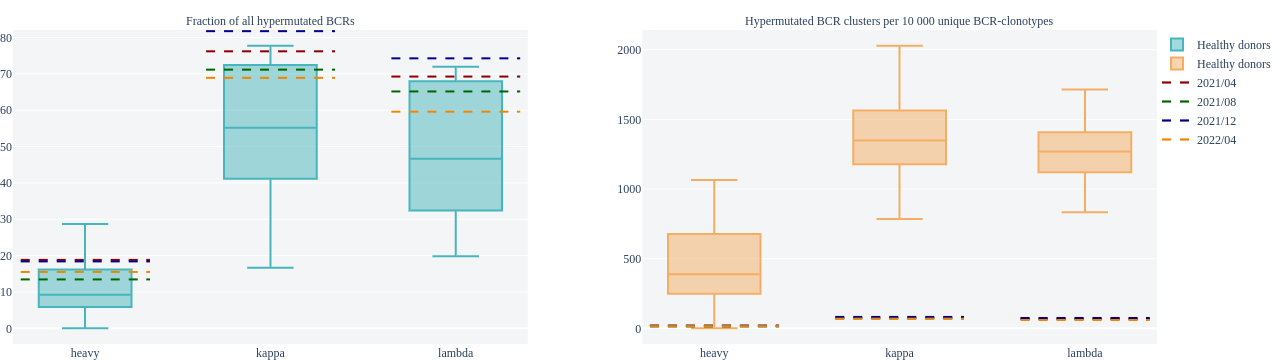

In [94]:
hypermutation_rate_plot(pathes_bcr,
                        names,
                        save_path,
                        material_type,
                        seq_type)

In [11]:
ls /uftp/Blood/db_calc_pipeline/akosenkov/Metrics/

 Age_cohorts.ipynb
 Alex_funcs.ipynb
 Assembling_cohorts.ipynb
 Clustering/
 Cohort_metrics.ipynb
 Cohorts.ipynb
 Cohorts_diagnoses.tsv
 Count_barplot_extended.py
 Count_barplot_regular.py
 Create_multiQC_file.ipynb
 Find_shared_clonotypes_by_cohort.ipynb
 Fraction_barplot_extended.py
 Fraction_barplot_regular.py
 Function_test_notebook.ipynb
 Functions_from_Kirill_02_22.ipynb
 Metrics.ipynb
 Morisita.py
 MultiQC_pipeline.ipynb
 Overlap.py
 PBMC_BULK_top_10_timepoints_all_alpha.svg
 PBMC_BULK_top_5_timepoints_all_light.svg
 Plots_XCR_work_notebook.ipynb
 Processing_from_Kirill_new.ipynb
 Property_plotting.ipynb
 QC.ipynb
 QC_CR.py
 QNS_functions.ipynb
 QNS_functions_good_statistic.ipynb
'Statistic_calc&plot.ipynb'
 Statistic_calc_and_plot.py
 Statistic_calc_plot.py
 Statistic_plot.ipynb
 TCR_clustering_validation.ipynb
 Test_notebook.ipynb
 Top_Clonotypes_Timepoints.ipynb
 Top_clones_histogram.py
 Top_clones_public_analysis.py
 Top_clonotypes_time_points.py
 Tumor_clone_time_points_his

In [98]:
# cp -r /home/jovyan/Metrics/ /uftp/Blood/db_calc_pipeline/akosenkov/